# Info

La información sobre los porque y contexto del proyecto así como su información acerca de las variables fue guardada en Github (https://github.com/devFrow/Proyecto_trancitorio.git)
para una mayor comodidad a la hora de trabajar con el código. 

### Comienzo

El tratado de duplicados y nulos se hace en el archivo Tratamiento_nulos.ipynb que se encuentra dentro del mismo repositorio. 
Aquí vamos a comenzar directamente con el EDA. 

| **Alrededores y Forma** | **Ubicación**  | **Tamaños** | **Estilos** | **Estados** | **Tiempo** | **Techo** | **Revestimiento** | **Porch** | **Venta** |
|-------------------------|----------------|-------------|-------------|-------------|------------|-----------|-------------------|-----------|-----------|
| Street | MSZoning | LotFrontage | MSSubClass | OverallQual | YearBuilt | RoofMatl | Exterior1st | OpenPorchSF | SaleType |
| Alley | Neighborhood | LotArea | BldgType | OverallCond |	YearRemodAdd | RoofStyle | Exterior2nd | EnclosedPorch | SaleCondition |
| LotShape | Condition1 | TotalBsmtSF | HouseStyle | Functional | MoSold | | MasVnrType | 3SsnPorch | 	|
| LandContour |	Condition2 | 1stFlrSF | 	| 	| YrSold | 	 | MasVnrArea | ScreenPorch	|  |
| LotConfig |  | 2ndFlrSF |  |  |  |  |	ExterQual |  |  |
| LandSlope |  | LowQualFinSF |  |  |  |  | ExterCond |  |  |  
|  |  | GrLivArea |  |  |  |  |  |  |  |	

  ---------------

|**Cimientos**|**Sótano**|**Calefacción/Aire**|**Servicios**|**Baños**|**Habitaciones**|**Cocina**|**Garage**|**Extras**|
|-------------|----------|--------------------|-------------|---------|----------------|----------|----------|----------|
| Foundation | BsmtQual | Heating | Utilities | BsmtFullBath | Bedroom | Kitchen | GarageType | WoodDeckSF |
|  | BsmtCond | HeatingQC | Electrical | BsmtHalfBath | TotRmsAbvGrd | KitchenQual | GarageYrBlt | PoolArea |
|  | BsmtExposure | CentralAir |  | FullBath |  |  | GarageFinish |	PoolQC |
|  | BsmtFinType1 | Fireplaces |  | HalfBath |  |  | GarageCars | Fence |
|  | BsmtFinSF1 | FireplaceQu |  |  |  |  | GarageArea | MiscFeature |
|  | BsmtFinType2 |  |  |  |  |  | GarageQual | MiscVal |
|  | BsmtFinSF2 |  |  |  |  |  | GarageCond |  |
|  | BsmtUnfSF |  |  |  |  |  | PavedDrive |  |

Esta es toda la data separada por categorías para estudiarla en conjuntos.

### Librerías y funciones    

In [628]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors



### Carga de datos

In [629]:
url = 'https://raw.githubusercontent.com/devFrow/Proyecto_coder/main/df_train.csv'
url2 = 'https://raw.githubusercontent.com/devFrow/Proyecto_coder/main/df_test.csv'

df_train = pd.read_csv(url, sep = ',')
df_test = pd.read_csv(url2, sep = ',')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



#  1. Alrededores y forma.

Donde se encuentran las variables: **Street**, **Alley**, **LotShape**, **landContour**, **LotConfig** y **LandSlope**.

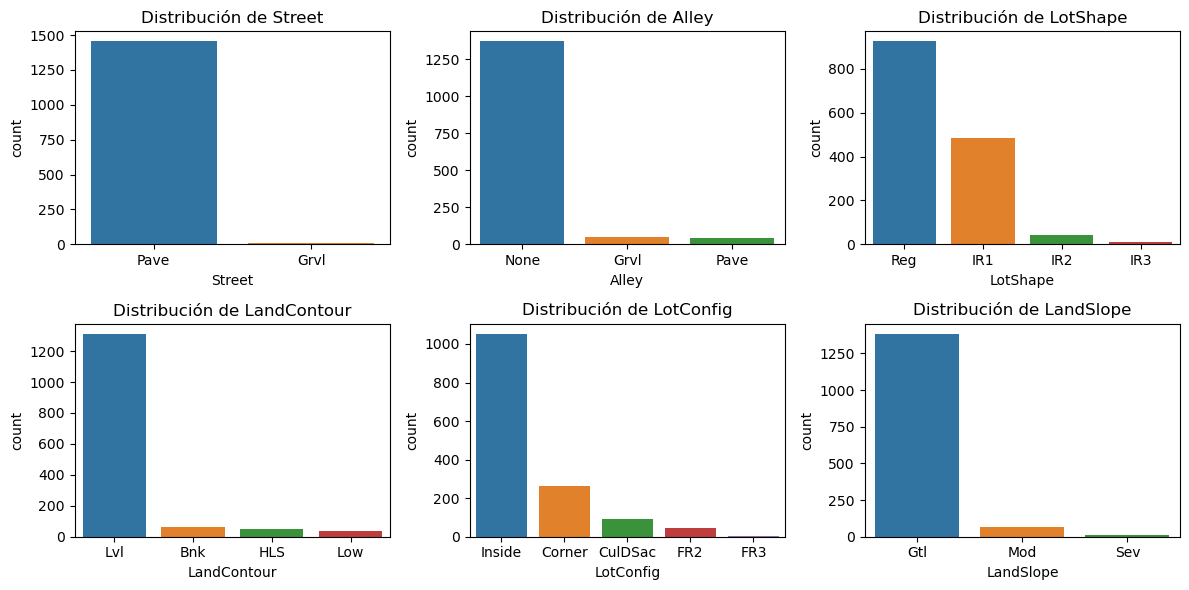

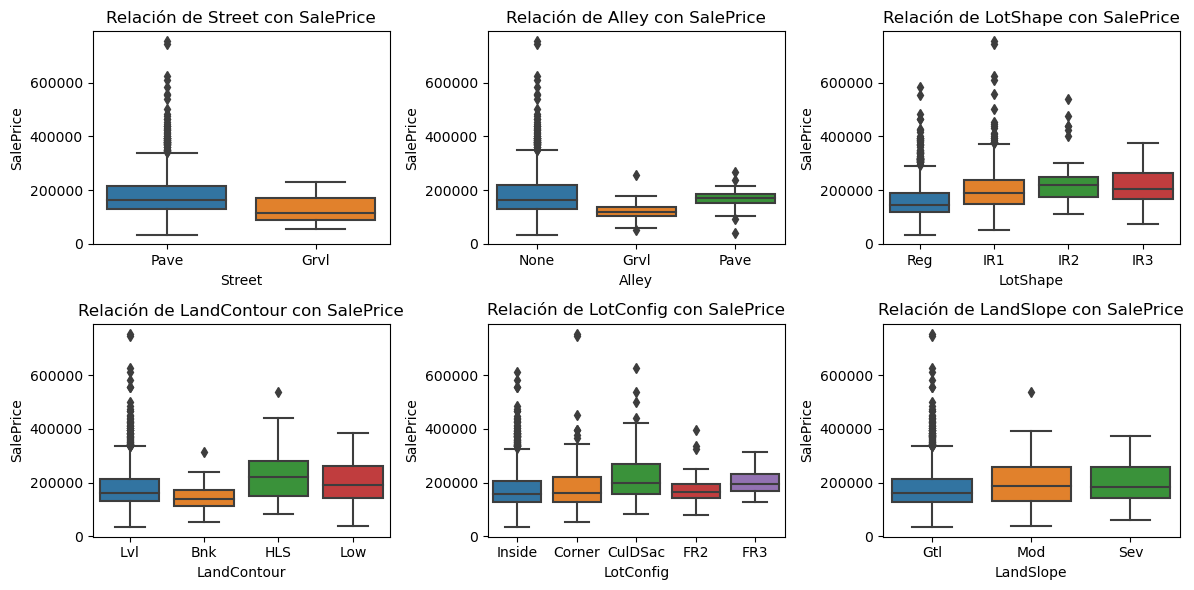

In [630]:
# Definir la lista de variables para el grupo 'Alrededores y Forma'
grupo_alrededores_forma = ['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope']

# Crear subplots para la distribución de variables categóricas
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
for i, var in enumerate(grupo_alrededores_forma):
    fila = i // 3
    columna = i % 3
    sns.countplot(x=var, data=df_train, ax=axs[fila, columna], order=df_train[var].value_counts().index)
    axs[fila, columna].set_title(f'Distribución de {var}')

plt.tight_layout()

# Crear subplots para los boxplots de relación con el precio de venta
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
for i, var in enumerate(grupo_alrededores_forma):
    fila = i // 3
    columna = i % 3
    sns.boxplot(x=var, y='SalePrice', data=df_train, ax=axs[fila, columna], order=df_train[var].value_counts().index)
    axs[fila, columna].set_title(f'Relación de {var} con SalePrice')

plt.tight_layout()
plt.show()

### Conclusiones: 

**street** - habla sobre el tipo de calle donde se encuentra la propiedad
 
Esta variable nos haria pensar intutivamente que es buena predictora y el box plot no hace ver que de echo hay una diferencia entre tener pavimento o no, pero lamentablemente la variable esta altamente desvalanceada como para usarla en un modelo.

**Alley** - habla sobre un acceso tracero o diferente al principal 

Aqui veo algo similar que en street se nota una variacion en el precio posiblemete porque tener esta categoria este correlacionado con el tamaño de la casa, pero de nuevo los datos estan altamente desbalaceados.

In [631]:
#Agrupando las posivilidades de LotShape 

df_testeos = df_train[['LotShape']].copy()
df_testeos['LotShape_Grouped'] = df_testeos['LotShape'].apply(lambda x: 'Reg' if x == 'Reg' else 'IReg')
df_testeos.drop(columns=['LotShape'], inplace=True)
df_testeos['SalePrice'] = df_train['SalePrice']

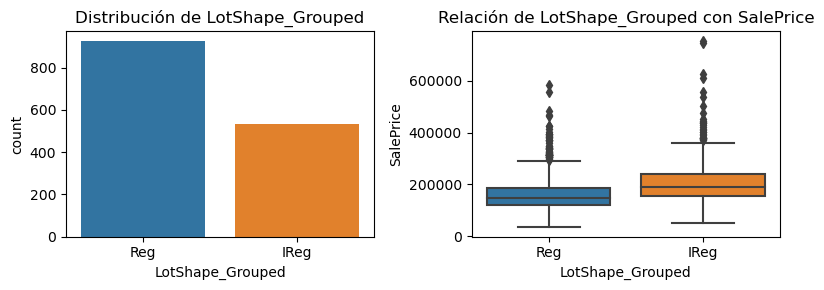

In [632]:
# Crear subplots para la distribución de la nueva variable y el boxplot con SalePrice
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sns.countplot(x='LotShape_Grouped', data=df_testeos, ax=axs[0])
axs[0].set_title('Distribución de LotShape_Grouped')

sns.boxplot(x='LotShape_Grouped', y='SalePrice', data=df_testeos, ax=axs[1])
axs[1].set_title('Relación de LotShape_Grouped con SalePrice')

plt.tight_layout()
plt.show()


**LotShape** - habla de la forma de terreno 

En el primer grafico se veia una diferencia entre los terrenos con forma iregular y los regulares, pero no me convencia la distribuvion por tener pocos datos para cada categoría a esepcion de los regulares con lo cual agrupe los irregulares para formar una variable binaria  que tenga una mejor distribucion y que refleje esa relacion con el precio de venta.

**LandContour** - habla sobre que tan plano es el terreno 

Aquí nos encontramos con el mismo problema que en los primeros casos, los datos estan demaciado desbalanceados mas del 95 % de los datos pertenecen a "lvl" que indica que el terreno es practicamente plano pero además la diferencia de precios no parece mostrar una correlacion  clara. 

**LotConfig** - habla de la configuracion del lote segun su posicion dentro de la cuadra. 

Esta variable tambien esta altamente debalanceada aunque un poco menos que la anterior, por otro lado el boxplot nos muestra eh las medianas se mantienen bastante parecidas con lo cual no veo que tenga gran aporte. 

**LandSlope** - habla sobre la pendiente que tenga el terreno

Aqui solo voy a mensionar lo desbalanceado de los datos.

In [633]:
## trasformando las variables a números: 

#street a binario 1 = pave 0 = Grvl
df_train['Street'] = df_train['Street'].map({'Pave': 1, 'Grvl': 0})
#Alley a binario 1 = alley 0 = no alley 
df_train['Alley'] = df_train['Alley'].map(lambda x: 0 if x == 'None' else 1)
#LotShape a binario =  1 = Reg 0 IReg
df_train['LotShape'] = df_train['LotShape'].map(lambda x: 1 if x == 'Reg' else 0)

In [634]:
# Label encoder para 'LandContour', 'LotConfig', 'LandSlope'
variables_a_factorizar = ['LandContour', 'LotConfig', 'LandSlope']

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada variable categórica y aplicar LabelEncoder
for var in variables_a_factorizar:
    df_train[var] = label_encoder.fit_transform(df_train[var])

#  2. Ubicación.

Donde se encuentran las variables: **MSZoning**, **Neighborhood**, **Condition1**, **Condition2**.

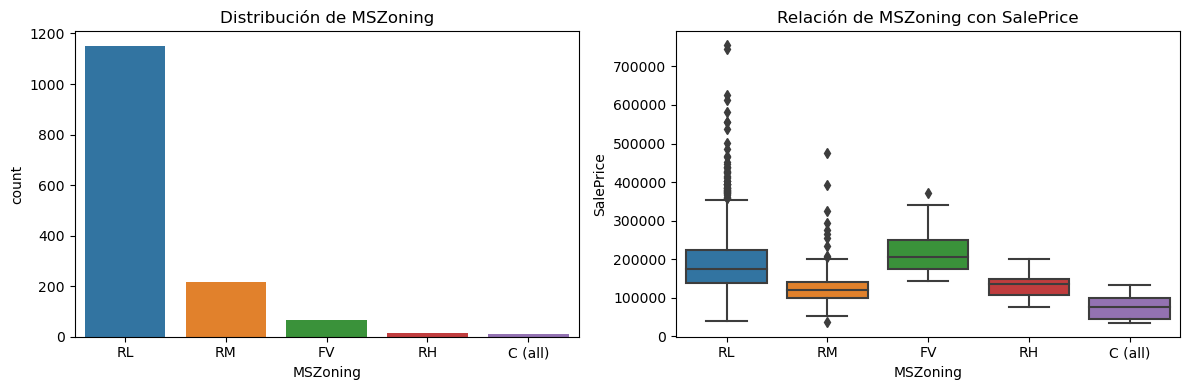

In [635]:
# Crear subplots de 1x2 para MSZoning
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='MSZoning', data=df_train, ax=axs[0], order=df_train['MSZoning'].value_counts().index)
axs[0].set_title('Distribución de MSZoning')

sns.boxplot(x='MSZoning', y='SalePrice', data=df_train, ax=axs[1], order=df_train['MSZoning'].value_counts().index)
axs[1].set_title('Relación de MSZoning con SalePrice')

plt.tight_layout()
plt.show()


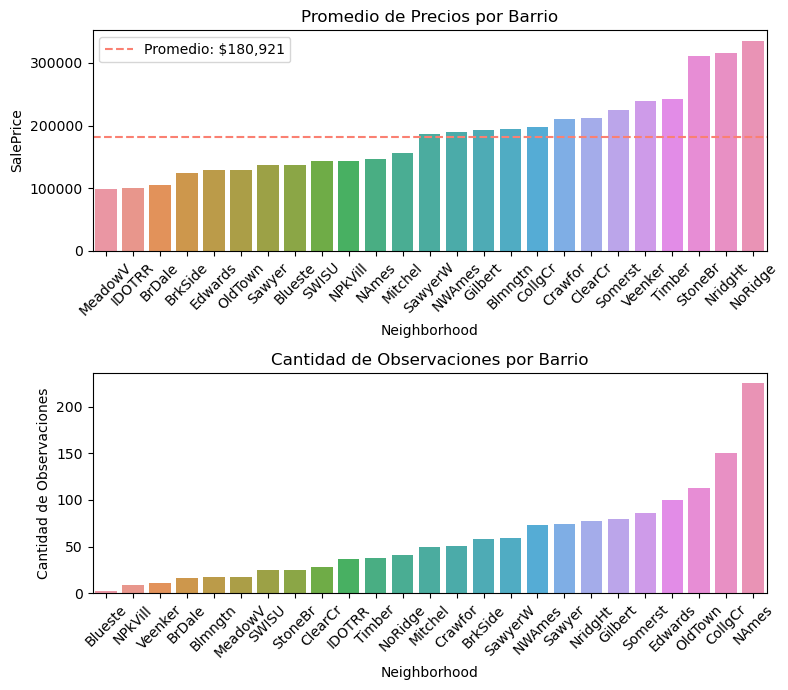

In [636]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))

# Gráfico de barras para el promedio de precios por barrio
sns.barplot(x=df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index,
            y=df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values(),
            ax=axs[0])
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Promedio de Precios por Barrio')
axs[0].tick_params(axis='x', rotation=45)  
mean_line = df_train['SalePrice'].mean()
axs[0].axhline(y=mean_line, linestyle='dashed', color='salmon', label=f'Promedio: ${mean_line:,.0f}')
axs[0].legend()

# Obtener el orden de los barrios por cantidad de observaciones
neighborhood_order = df_train['Neighborhood'].value_counts().sort_values().index

# Gráfico de barras para la cantidad de observaciones por barrio
sns.countplot(x='Neighborhood', data=df_train, order=neighborhood_order, ax=axs[1])
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Cantidad de Observaciones')
axs[1].set_title('Cantidad de Observaciones por Barrio')
axs[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

In [637]:
# Crear tabla de conteo de valores y precio promedio para Condition 1
table_data = pd.concat([df_train['Condition1'].value_counts(), 
                        df_train.groupby('Condition1')['SalePrice'].mean()], axis=1)
table_data.columns = ['Cantidad', 'Precio Promedio']
table_data = table_data.sort_values(by='Cantidad', ascending=False)
print("Tabla para Condition 1:")
print(table_data)

# Crear tabla de conteo de valores y precio promedio para Condition 2
table_data2 = pd.concat([df_train['Condition2'].value_counts(), 
                         df_train.groupby('Condition2')['SalePrice'].mean()], axis=1)
table_data2.columns = ['Cantidad', 'Precio Promedio']
table_data2 = table_data2.sort_values(by='Cantidad', ascending=False)
print("\nTabla para Condition 2:")
print(table_data2)


Tabla para Condition 1:
        Cantidad  Precio Promedio
Norm        1260    184495.492063
Feedr         81    142475.481481
Artery        48    135091.666667
RRAn          26    184396.615385
PosN          19    215184.210526
RRAe          11    138400.000000
PosA           8    225875.000000
RRNn           5    212400.000000
RRNe           2    190750.000000

Tabla para Condition 2:
        Cantidad  Precio Promedio
Norm        1445    181169.405536
Feedr          6    121166.666667
Artery         2    106500.000000
RRNn           2     96750.000000
PosN           2    284875.000000
PosA           1    325000.000000
RRAn           1    136905.000000
RRAe           1    190000.000000


### Conclusiones. 

MSZoning - habla de la zona donde esta la vivienda si es residencial o de otro tipo

Los datos están desbalanceados con gran predominancia de Residential Low Density y aunque algunas de las posibilidades muestran una diferencia notable en el precio esas son las que tienen menor cantidad de datos con lo cual no creo que sea una buena variable.

Neighborhood - habla del barrio 

Esta variable si parece ser buena porque se ve una clara relación con el precio mas adelante voy a tratar de simplificarla para que mejore su correlación o sea mas clara. 

Condition 1 y 2 - habla de la proximidad a varias condiciones como si la casa esta cerda de una calle principal. 

Ademas de estar muy desbalanceada no muestra una relación con el precio. 


In [638]:
#pasando categorías a números 

label_encoder = LabelEncoder()

# Variables a codificar
variables_codificar = ['MSZoning', 'Condition1', 'Condition2']

# Iterar sobre las variables y aplicar LabelEncoder
for columna in variables_codificar:
    df_train[columna] = label_encoder.fit_transform(df_train[columna])

# Ver los resultados
print(df_train[['MSZoning', 'Condition1', 'Condition2']].head())

## A Neighborhood la voy a dejar para más adelante la voy a tratar en feature engineering

   MSZoning  Condition1  Condition2
0         3           2           2
1         3           1           2
2         3           2           2
3         3           2           2
4         3           2           2


# 3. Tamaños 

Donde se encuentra las variables: **LotFrontage**, **LotArea**, **TotalBsmtSF**, **1stFlrSF**, **2ndFlrSF**, **LowQlFinSF**, **GrLivArea**.

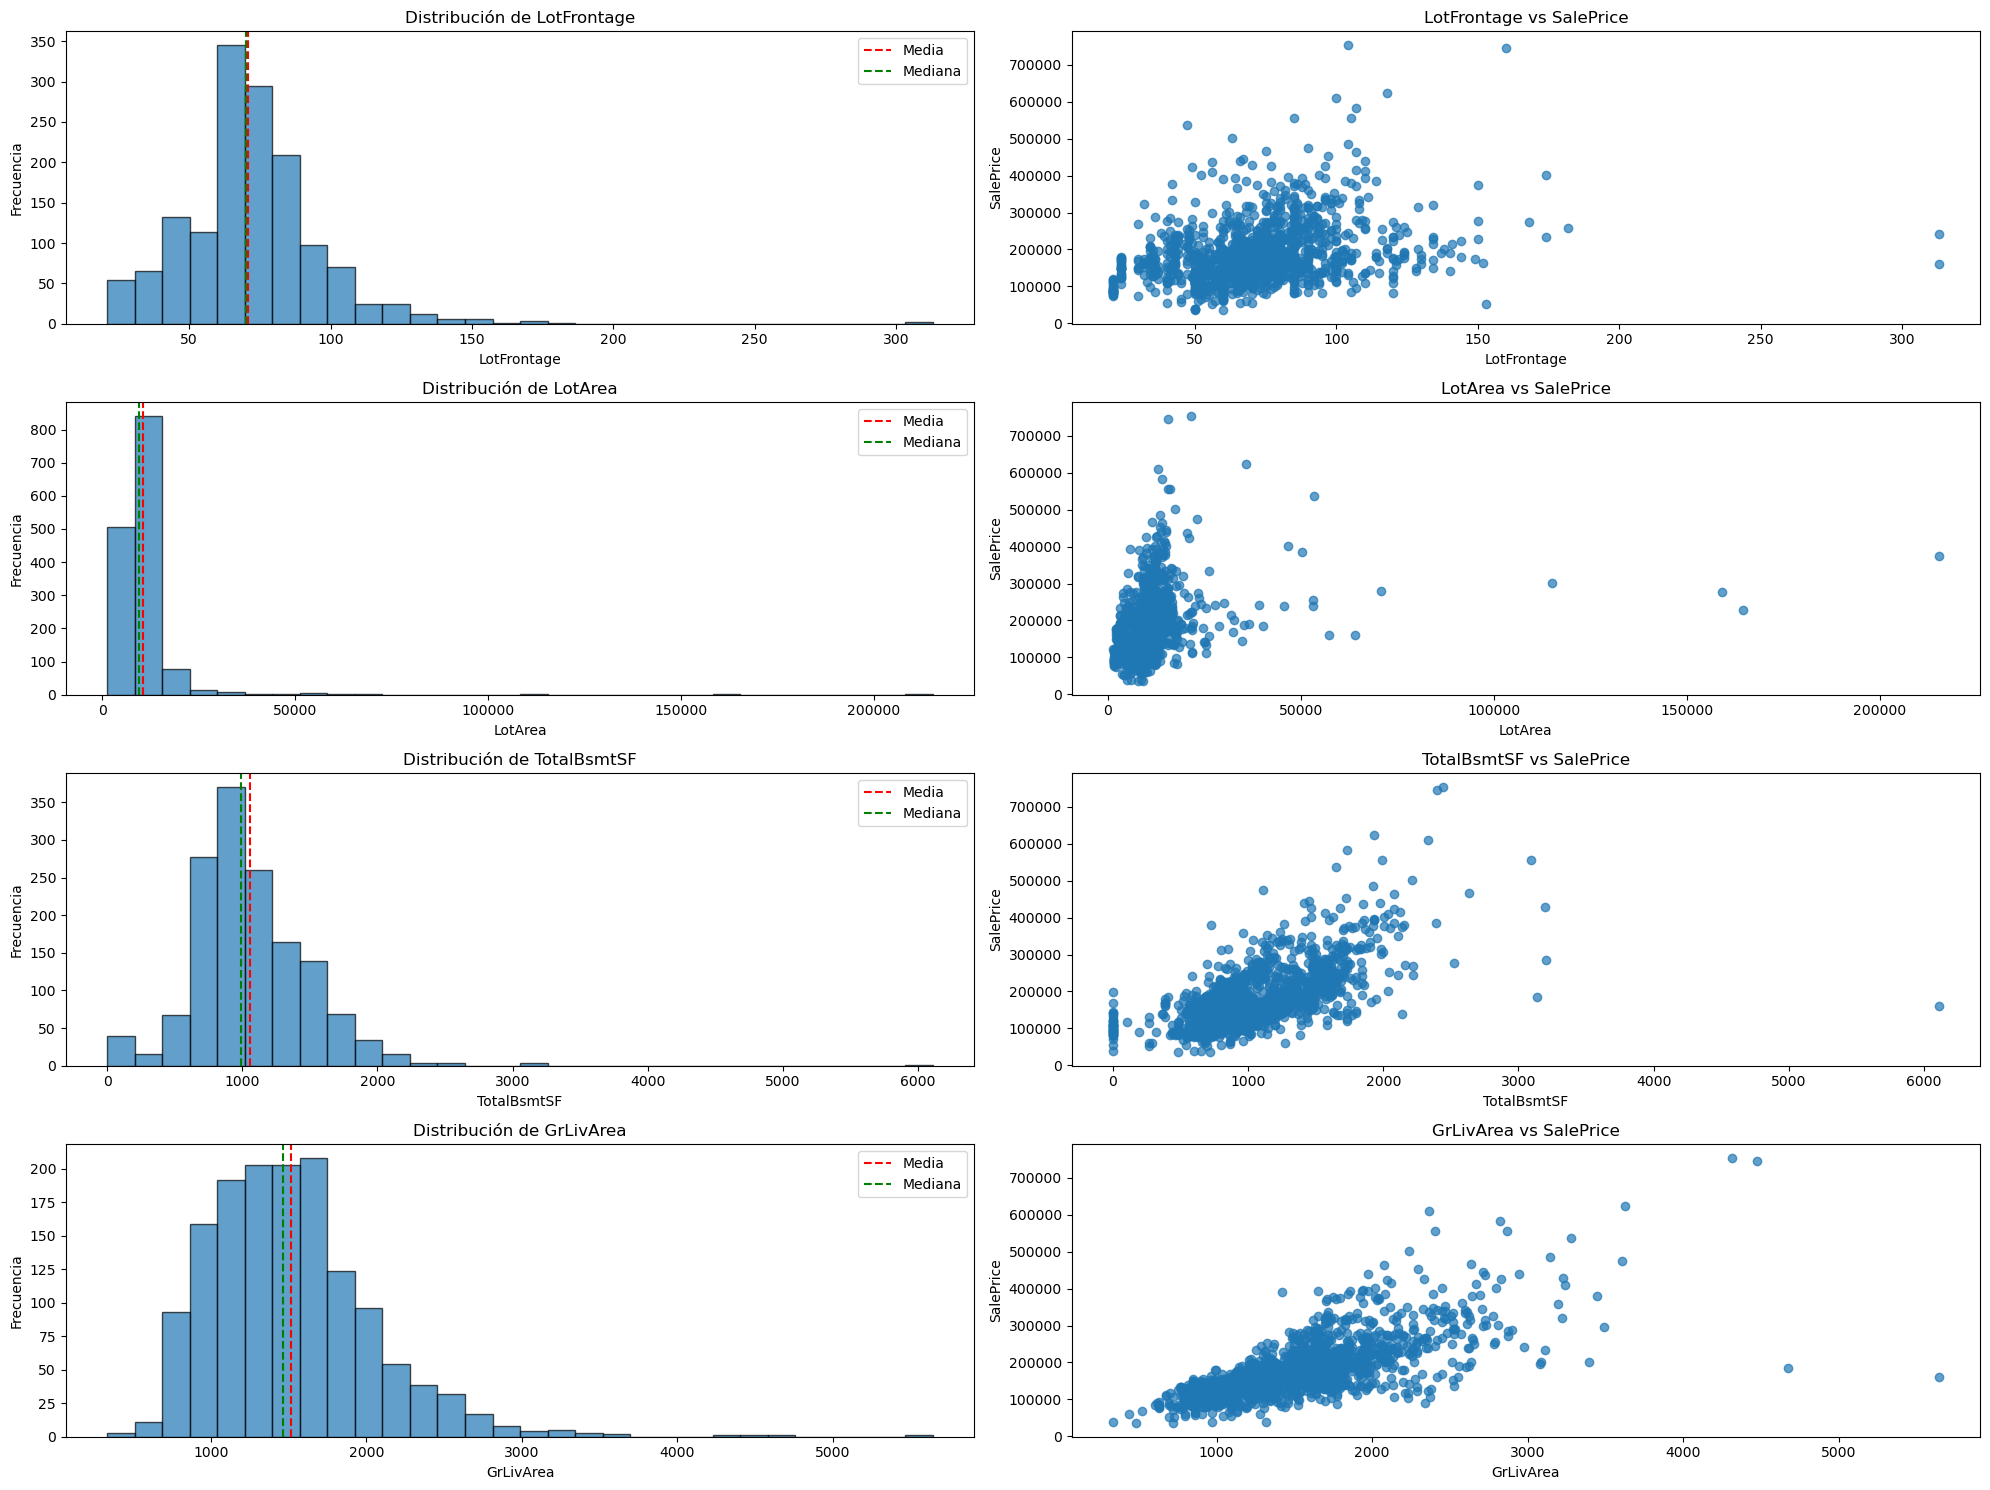

In [639]:
# Crear subplots para las variables de tamaño
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Histogramas con media y mediana para LotFrontage, LotArea, TotalBsmtSF y GrLivArea
numerical_vars = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea']
for i, var in enumerate(numerical_vars):
    axs[i, 0].hist(df_train[var], bins=30, alpha=0.7, edgecolor='black')  # Añadir contorno negro a las barras
    axs[i, 0].axvline(df_train[var].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Media')
    axs[i, 0].axvline(df_train[var].median(), color='green', linestyle='dashed', linewidth=1.5, label='Mediana')
    axs[i, 0].set_title(f'Distribución de {var}')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frecuencia')
    axs[i, 0].legend()

# Scatter plots para la relación con SalePrice
for i, var in enumerate(numerical_vars):
    axs[i, 1].scatter(df_train[var], df_train['SalePrice'], alpha=0.7)
    axs[i, 1].set_title(f'{var} vs SalePrice')
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('SalePrice')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()



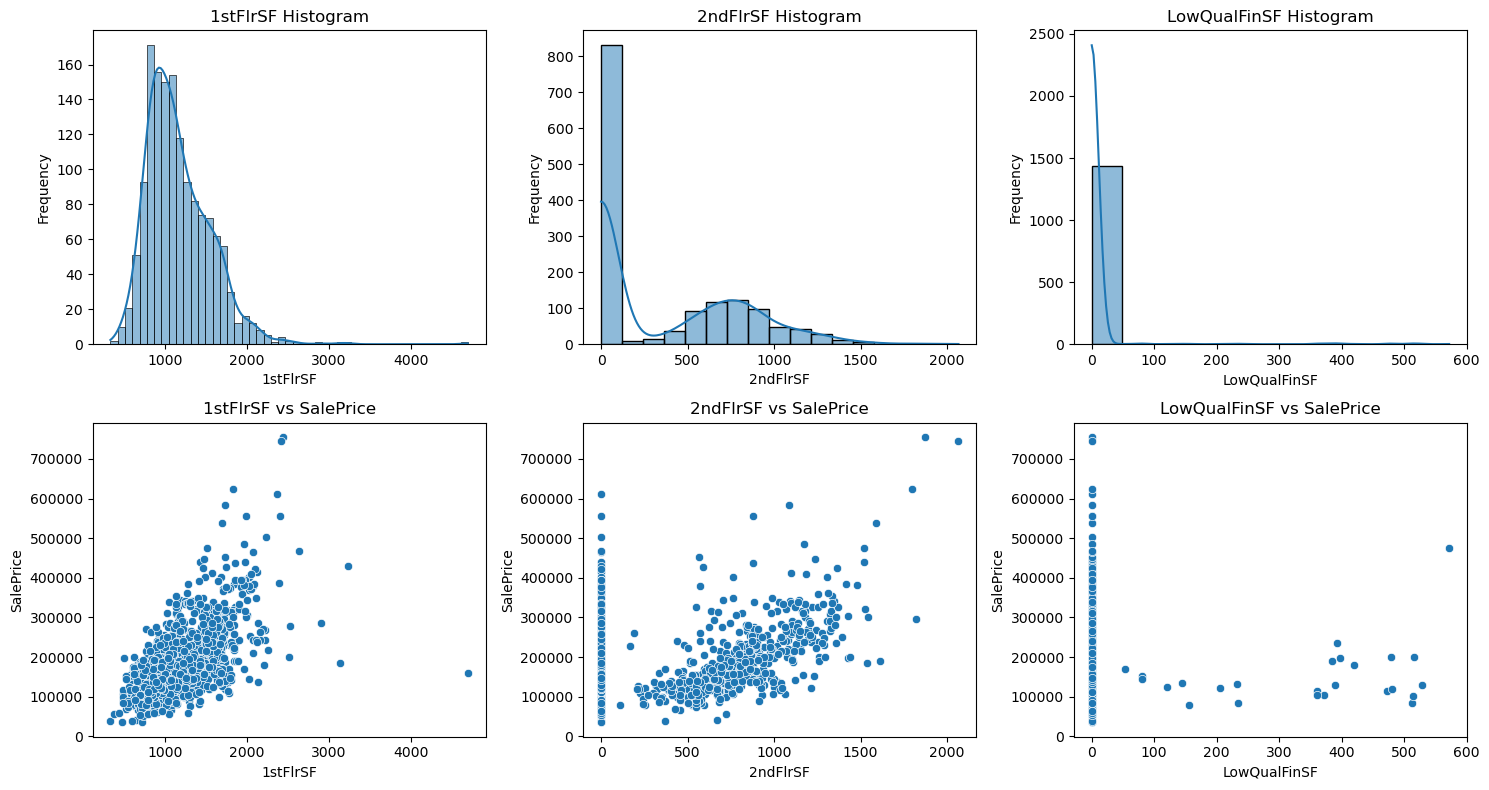

In [640]:

# Crear el subplot de 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histograma y scatter plot para 1stFlrSF
sns.histplot(df_train['1stFlrSF'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title('1stFlrSF Histogram')
axs[0, 0].set_xlabel('1stFlrSF')
axs[0, 0].set_ylabel('Frequency')
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df_train, ax=axs[1, 0])
axs[1, 0].set_title('1stFlrSF vs SalePrice')
axs[1, 0].set_xlabel('1stFlrSF')
axs[1, 0].set_ylabel('SalePrice')

# Histograma y scatter plot para 2ndFlrSF
sns.histplot(df_train['2ndFlrSF'], ax=axs[0, 1], kde=True)
axs[0, 1].set_title('2ndFlrSF Histogram')
axs[0, 1].set_xlabel('2ndFlrSF')
axs[0, 1].set_ylabel('Frequency')
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df_train, ax=axs[1, 1])
axs[1, 1].set_title('2ndFlrSF vs SalePrice')
axs[1, 1].set_xlabel('2ndFlrSF')
axs[1, 1].set_ylabel('SalePrice')

# Histograma y scatter plot para LowQualFinSF
sns.histplot(df_train['LowQualFinSF'], ax=axs[0, 2], kde=True)
axs[0, 2].set_title('LowQualFinSF Histogram')
axs[0, 2].set_xlabel('LowQualFinSF')
axs[0, 2].set_ylabel('Frequency')
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=df_train, ax=axs[1, 2])
axs[1, 2].set_title('LowQualFinSF vs SalePrice')
axs[1, 2].set_xlabel('LowQualFinSF')
axs[1, 2].set_ylabel('SalePrice')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()



### Conclusiones

**LotFrontage** - que habla sobre el frente del terreno en pies cuadrados 

Esta variable no parece tener una alta correlación con el precio de venta, además de presentar sesgo positivo exagerado aunque esto es debido a la naturaleza de los datos ya que se podrían acotar algunos datos que parecen outliers pero que en realidad refieren a una disposición diferente del terreno en la manzana. Aun sin estos outliers la variable no presenta una correlación llamativa.  

**LotArea** - habla del Area del terreno en pies cuadrados .

Esta variable también presenta una correlación baja con respecto al precio, en primera medida pense que presentaba algunos outlier pero el precio se debe al estado de la casa y deposición del terreno ademas de esto quitando estas ultimas casas la correlación con la variable objetivo solo mejora de 0.2x a 0.3x con lo cual por el momento voy a dejarla de lado. 


Correlación después de modificar los valores entre TotalBsmtSF y SalePrice: 0.6525903543457099


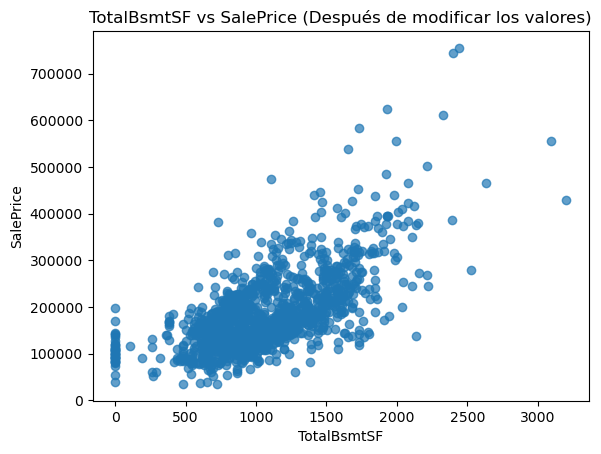

In [641]:
# Calcular el promedio de TotalBsmtSF
mean_total_bsmt_sf = df_train['TotalBsmtSF'].mean()

# Copiar el DataFrame para evitar modificar el original
df_copia = df_train.copy()

# Identificar los registros donde TotalBsmtSF es mayor a 3000 y SalePrice es menor a 400000
mask = (df_copia['TotalBsmtSF'] > 3000) & (df_copia['SalePrice'] < 400000)

# Asignar el promedio de TotalBsmtSF a los registros seleccionados por la máscara
df_copia.loc[mask, 'TotalBsmtSF'] = mean_total_bsmt_sf

# Calcular la correlación después de realizar los cambios
correlation_modified = df_copia['TotalBsmtSF'].corr(df_copia['SalePrice'])
print("Correlación después de modificar los valores entre TotalBsmtSF y SalePrice:", correlation_modified)

# Gráfico scatter para TotalBsmtSF y SalePrice después de realizar los cambios
plt.scatter(df_copia['TotalBsmtSF'], df_copia['SalePrice'], alpha=0.7)
plt.title('TotalBsmtSF vs SalePrice (Después de modificar los valores)')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


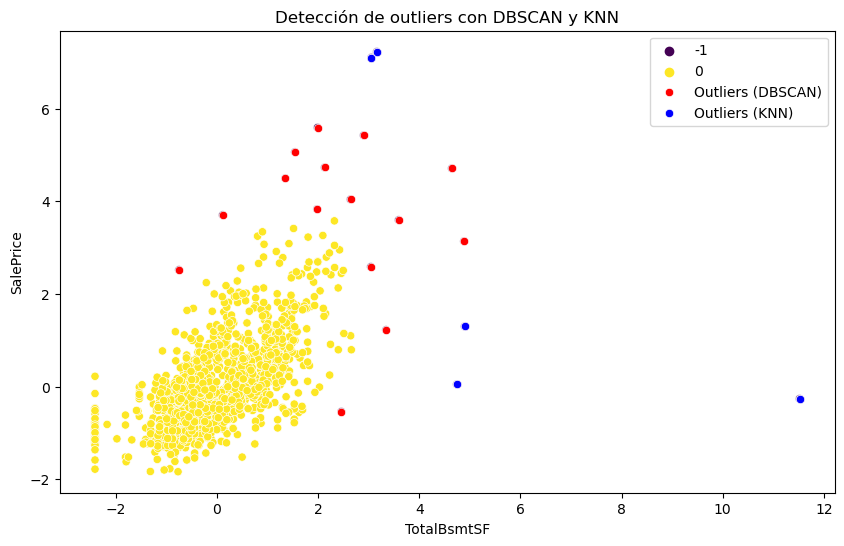

In [642]:

data = df_train[['TotalBsmtSF', 'SalePrice']].copy()

data = (data - data.mean()) / data.std()

# Parámetros DBSCAN
eps = 0.5
min_samples = 5

# Creamos el modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Entrenamos el modelo y predecimos los clusters
clusters = dbscan.fit_predict(data)

# Filtramos los puntos considerados outliers (cluster -1)
outliers = data[clusters == -1]

# Parámetros KNN
n_neighbors = 5

# Creamos el modelo KNN
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(data)

# Calculamos las distancias de los k vecinos más cercanos
distances, indices = knn.kneighbors(data)

# Obtenemos la distancia al k-ésimo vecino más cercano (k=5)
knn_distances = distances[:, -1]

# Umbral para considerar outliers (puedes ajustarlo según tus necesidades)
threshold = 2.2

# Filtramos los puntos considerados outliers por KNN
outliers_knn = data[knn_distances > threshold]

# Graficamos los datos con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data, hue=clusters, palette='viridis')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=outliers, color='red', label='Outliers (DBSCAN)')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=outliers_knn, color='blue', label='Outliers (KNN)')
plt.title('Detección de outliers con DBSCAN y KNN')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


In [643]:
# Filtramos los registros sin outliers detectados por DBSCAN
filtered_data_dbscan = data.drop(outliers.index)

# Filtramos los registros sin outliers detectados por KNN
filtered_data_knn = data.drop(outliers_knn.index)

# Calculamos la correlación entre TotalBsmtSF y SalePrice
correlation_dbscan = filtered_data_dbscan['TotalBsmtSF'].corr(df_train.loc[filtered_data_dbscan.index, 'SalePrice'])
correlation_knn = filtered_data_knn['TotalBsmtSF'].corr(df_train.loc[filtered_data_knn.index, 'SalePrice'])

print(f"Correlación sin outliers (DBSCAN): {correlation_dbscan}")
print(f"Correlación sin outliers (KNN): {correlation_knn}")


Correlación sin outliers (DBSCAN): 0.6339457414085139
Correlación sin outliers (KNN): 0.6482446681774433


**TotalBsmtSF** - Habla del tamaño del sótano en pies cuadrados  

Es una buena variable para predecir aunque presentaba algunos valores atípicos, encare el problema de dos maneras posibles la primera usando el gráfico y viendo cuales eran las características de los datos logrando mejorar la correlación de los datos de 0.613 a 0.652 y luego prove con DBScan y KNN 
pero ver como me agrupaba también logrando una mejoría en 0.633 y 0.648 respectivamente, voy a quedarme con el primer enfoque ya que logra mejores resultados y que me tome el tiempo de ver que no se estén ignorando datos. 

Correlación original entre GrLivArea y SalePrice: 0.7086244776126522
Correlación después de modificar los valores entre GrLivArea y SalePrice: 0.7349486019721145


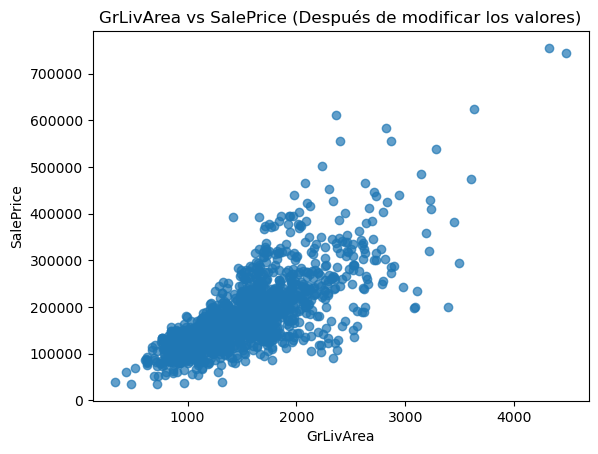

In [644]:
# Paso 1: Mostrar la correlación inicial de GrLivArea con SalePrice
correlation_original = df_train['GrLivArea'].corr(df_train['SalePrice'])
print("Correlación original entre GrLivArea y SalePrice:", correlation_original)

# Paso 2: Crear una copia del DataFrame y ajustar los valores de GrLivArea según la condición dada
df_copia = df_train.copy()

# Calcular el promedio de GrLivArea
mean_grlivarea = df_copia['GrLivArea'].mean()

# Identificar los registros donde GrLivArea es mayor a 4000 y SalePrice es menor a 300000
mask = (df_copia['GrLivArea'] > 4000) & (df_copia['SalePrice'] < 300000)

# Asignar el promedio de GrLivArea a los registros seleccionados por la máscara
df_copia.loc[mask, 'GrLivArea'] = mean_grlivarea

# Paso 3: Mostrar la correlación después de realizar los cambios
correlation_modified = df_copia['GrLivArea'].corr(df_copia['SalePrice'])
print("Correlación después de modificar los valores entre GrLivArea y SalePrice:", correlation_modified)

# Paso 4: Gráfico scatter para GrLivArea y SalePrice después de modificar los valores
plt.scatter(df_copia['GrLivArea'], df_copia['SalePrice'], alpha=0.7)
plt.title('GrLivArea vs SalePrice (Después de modificar los valores)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


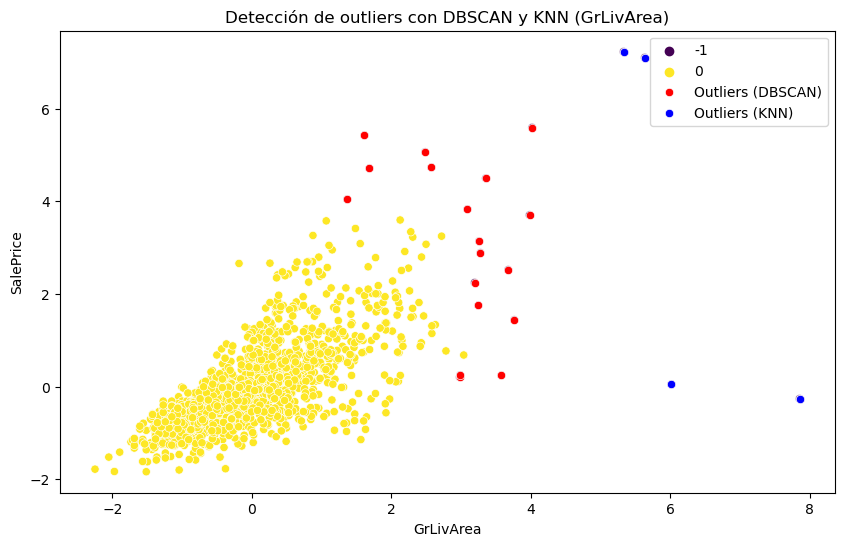

In [645]:


# Seleccionar las variables de interés y crear una copia
data = df_train[['GrLivArea', 'SalePrice']].copy()

# Normalizar los datos
data = (data - data.mean()) / data.std()

# Parámetros DBSCAN
eps = 0.5
min_samples = 5

# Creamos el modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Entrenamos el modelo y predecimos los clusters
clusters = dbscan.fit_predict(data)

# Filtramos los puntos considerados outliers (cluster -1)
outliers = data[clusters == -1]

# Parámetros KNN
n_neighbors = 5

# Creamos el modelo KNN
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(data)

# Calculamos las distancias de los k vecinos más cercanos
distances, indices = knn.kneighbors(data)

# Obtenemos la distancia al k-ésimo vecino más cercano (k=5)
knn_distances = distances[:, -1]

# Umbral para considerar outliers (puedes ajustarlo según tus necesidades)
threshold = 2.2

# Filtramos los puntos considerados outliers por KNN
outliers_knn = data[knn_distances > threshold]

# Graficamos los datos con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, hue=clusters, palette='viridis')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=outliers, color='red', label='Outliers (DBSCAN)')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=outliers_knn, color='blue', label='Outliers (KNN)')
plt.title('Detección de outliers con DBSCAN y KNN (GrLivArea)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


In [646]:
# Filtramos los registros sin outliers detectados por DBSCAN
filtered_data_dbscan = data.drop(outliers.index)

# Filtramos los registros sin outliers detectados por KNN
filtered_data_knn = data.drop(outliers_knn.index)

# Calculamos la correlación entre GrLivArea y SalePrice
correlation_dbscan = filtered_data_dbscan['GrLivArea'].corr(df_train.loc[filtered_data_dbscan.index, 'SalePrice'])
correlation_knn = filtered_data_knn['GrLivArea'].corr(df_train.loc[filtered_data_knn.index, 'SalePrice'])

print(f"Correlación sin outliers (DBSCAN): {correlation_dbscan}")
print(f"Correlación sin outliers (KNN): {correlation_knn}")


Correlación sin outliers (DBSCAN): 0.7060636438476369
Correlación sin outliers (KNN): 0.7205163006738733


**GrLivArea** - habla sobre el tamaño total  habitable por encima del nivel del suelo. 

Esta es una gran variable predictiva que también cuanta con algunos valores atípicos, otra vez voy a tomar un enfoque mas arbitrario para tratar estos casos ya que aparentemente los modelos no logran capturar bien los grupos pequeños que tiene una explicación lógica para alejarse de la masa ya que son casas grandes con precios elevados, esto se debe seguramente a la baja cantidad de registros para el análisis. 

**1stFlrSF** & **2ndFlrSF** - Estas hablan del tamaño en pies cuadrados del primer y segundo piso respectivamente. 

Estas dos características muestran una correlación marcada con el precio de vente pero voy a dejarlas de lado porque esta correlación ya se ve en GrLivArea que es una mesura que abarca a estas dos.  

**LowQualFinSF** - habla de terminaciones de baja calidad en pies cuadrados. 

Esta variable esta demasiado desbalanceada tendiendo solo 26 casos sobre el total. 

# 4. Estilos  

Donde se encuentra las variables: **MSSubClass**, **BldgType**, **HouseStyle** 

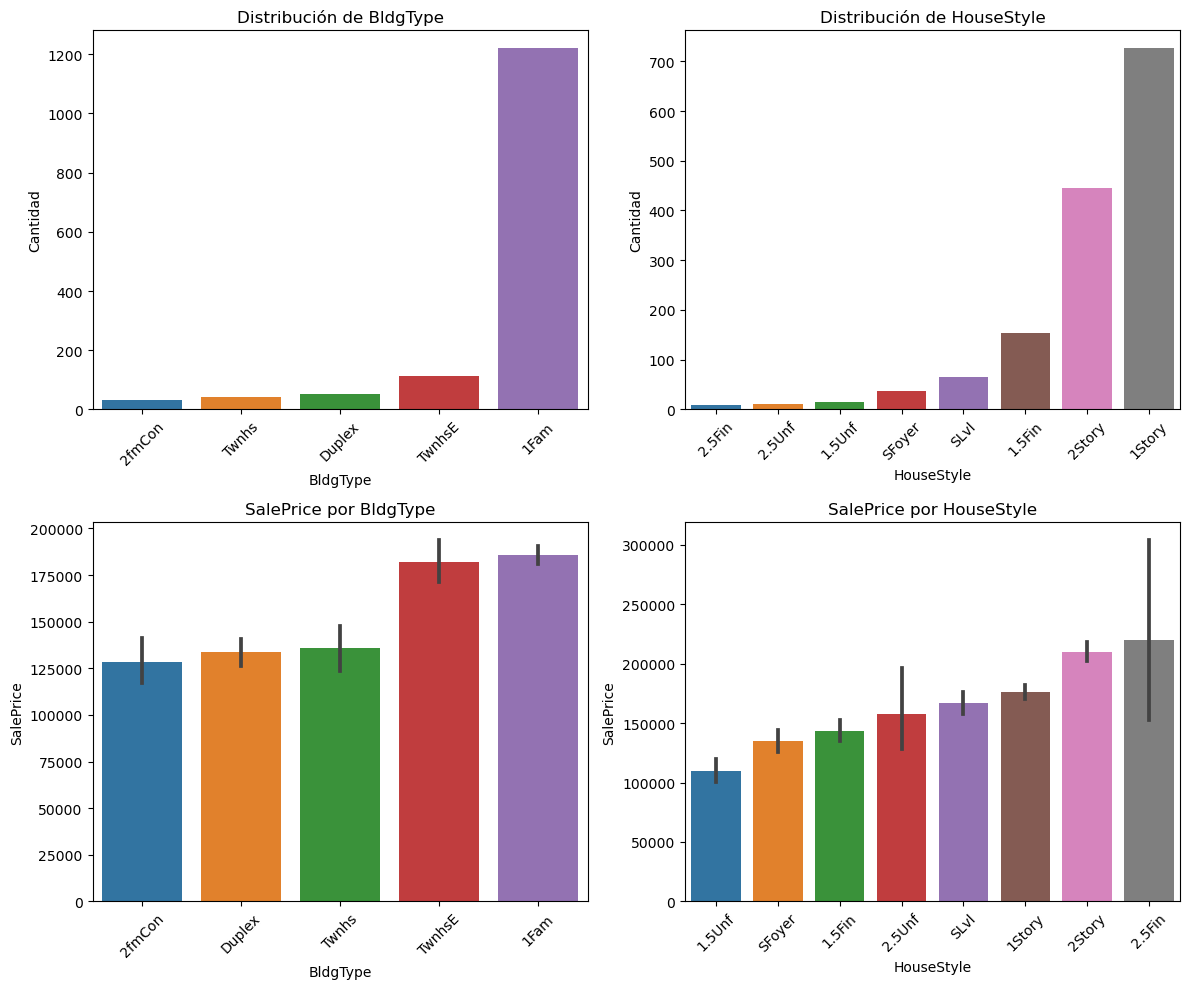

In [647]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Lista de las categorías a considerar
categorias = ['BldgType', 'HouseStyle']

for i, categoria in enumerate(categorias):
    # Gráfico de barras para la cantidad de observaciones por categoría (ordenadas por cantidad)
    sns.countplot(x=categoria, data=df_train, order=df_train[categoria].value_counts().sort_values().index, ax=axs[0, i])
    axs[0, i].set_title(f'Distribución de {categoria}')
    axs[0, i].set_xlabel(categoria)
    axs[0, i].set_ylabel('Cantidad')
    axs[0, i].tick_params(axis='x', rotation=45)

    # Gráfico de barras para SalePrice por categoría (ordenadas por precio)
    sns.barplot(x=categoria, y='SalePrice', data=df_train, order=df_train.groupby(categoria)['SalePrice'].mean().sort_values().index, ax=axs[1, i])
    axs[1, i].set_title(f'SalePrice por {categoria}')
    axs[1, i].set_xlabel(categoria)
    axs[1, i].set_ylabel('SalePrice')
    axs[1, i].tick_params(axis='x', rotation=45)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

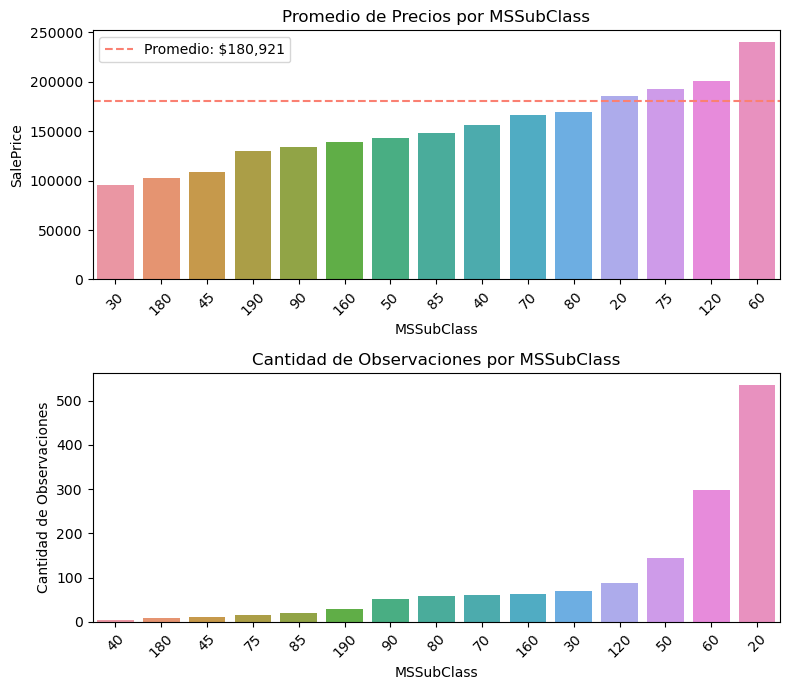

In [648]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))

# Gráfico de barras para el promedio de precios por categoría MSSubClass
sns.barplot(x=df_train.groupby('MSSubClass')['SalePrice'].mean().sort_values().index,
            y=df_train.groupby('MSSubClass')['SalePrice'].mean().sort_values(),
            ax=axs[0], order=df_train.groupby('MSSubClass')['SalePrice'].mean().sort_values().index)
axs[0].set_xlabel('MSSubClass')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Promedio de Precios por MSSubClass')
axs[0].tick_params(axis='x', rotation=45)  
mean_line = df_train['SalePrice'].mean()
axs[0].axhline(y=mean_line, linestyle='dashed', color='salmon', label=f'Promedio: ${mean_line:,.0f}')
axs[0].legend()

# Obtener el orden de las categorías MSSubClass por cantidad de observaciones
mssubclass_order = df_train['MSSubClass'].value_counts().sort_values().index

# Gráfico de barras para la cantidad de observaciones por categoría MSSubClass
sns.countplot(x='MSSubClass', data=df_train, order=mssubclass_order, ax=axs[1])
axs[1].set_xlabel('MSSubClass')
axs[1].set_ylabel('Cantidad de Observaciones')
axs[1].set_title('Cantidad de Observaciones por MSSubClass')
axs[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

### Conclusiones  

**BldgStype** - habla sobre el tipo de casa

Esta variable esta muy desbalanceada como para funcionar bien.

**HouseStyle** Habla sobre el sobre el estilo de la casa (1 piso, 2 pisos etc)

Esta variable si parece mostrar cierta correlación con el precio y ademas intuitivamente uno pensaría que asi es, pero lamentablemente la la poca cantidad de datos y su desbalance hace que el patron se desdibuje, más adelante voy a ver si puedo armar una nueva a partir de esta.

**MSSubClass** habla sobre el hablan en cierta manera también del tipo de edificio (de hecho hay algunas clasificaciones con Sfoyer que se repiten)

Aunque esta variable esta relacionada con las demás esta mejor balanceada y también muestra una correlación con el precio, más adelante voy a ver con puedo hacer para reagruparla y mejorar su correlación y si simplemente usar un one hot encoding 

# 5. Estados

Donde se encuentran las variable: **OverAllCond**, **OverAllQual**, **Funcional** 

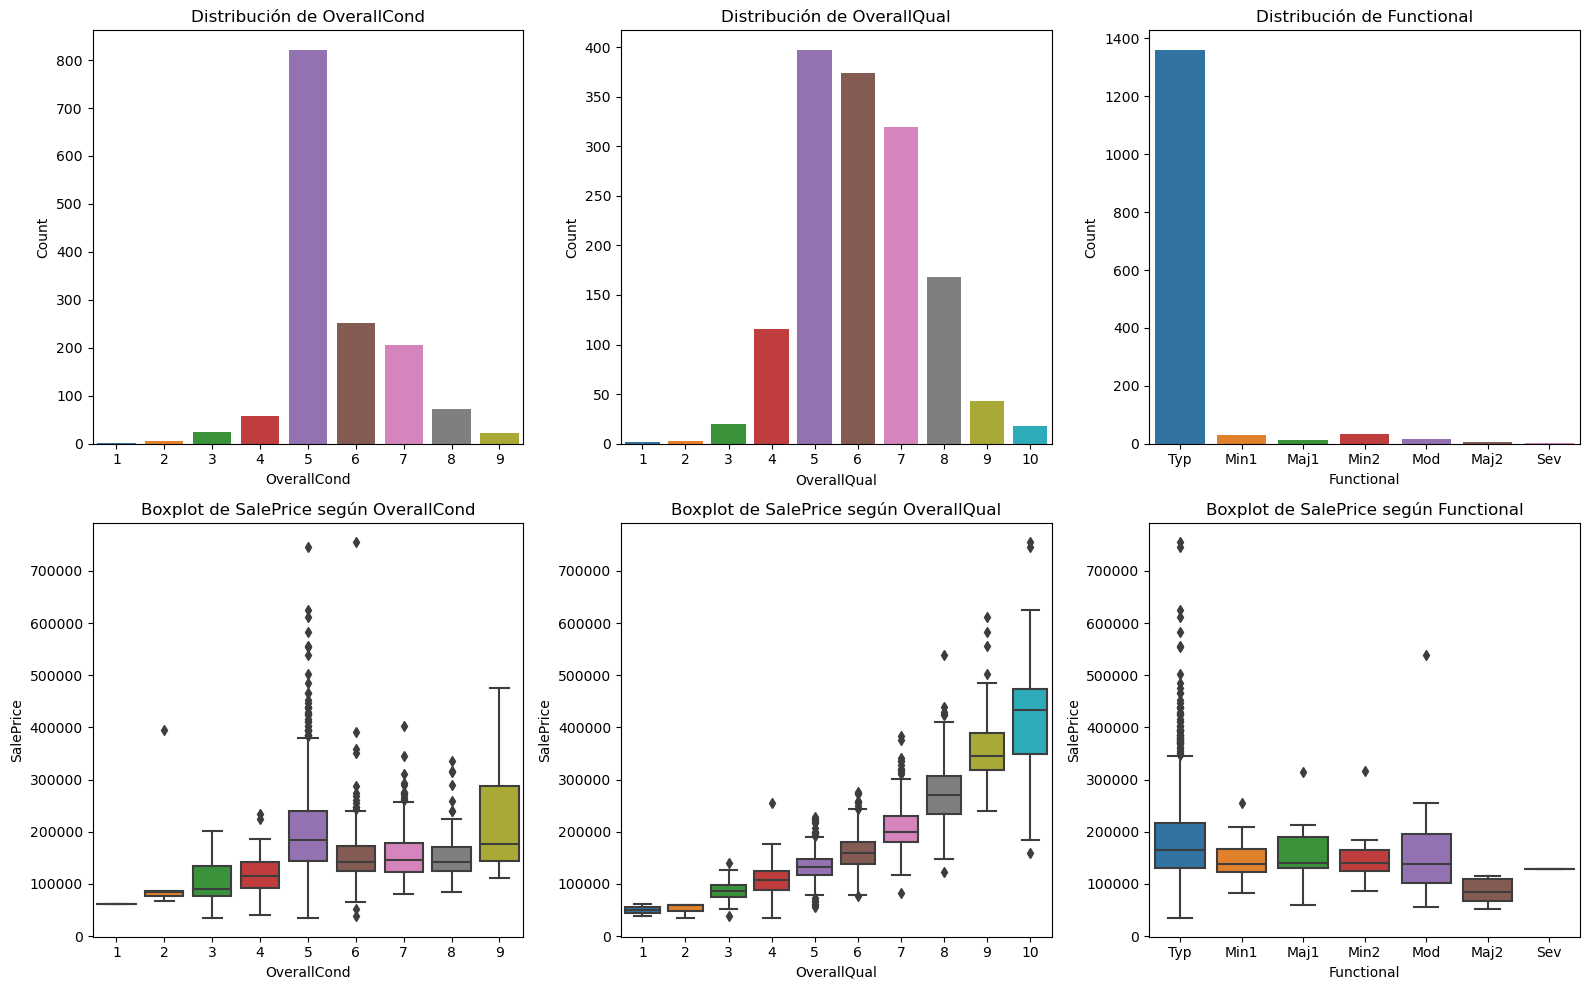

In [649]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Lista de las categorías a considerar
categorias = ['OverallCond', 'OverallQual', 'Functional']

for i, categoria in enumerate(categorias):
    # Gráfico de barras para la distribución
    sns.countplot(x=categoria, data=df_train, ax=axs[0, i])
    axs[0, i].set_title(f'Distribución de {categoria}')
    axs[0, i].set_xlabel(categoria)
    axs[0, i].set_ylabel('Count')

    # Boxplot para la relación con SalePrice
    sns.boxplot(x=categoria, y='SalePrice', data=df_train, ax=axs[1, i])
    axs[1, i].set_title(f'Boxplot de SalePrice según {categoria}')
    axs[1, i].set_xlabel(categoria)
    axs[1, i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [650]:
# Mapeo para la variable Functional
mapeo_functional = {
    'Typ': 5,
    'Min1': 4,
    'Min2': 4,
    'Mod': 3,
    'Maj1': 2,
    'Maj2': 2,
    'Sev': 1,
    'Sal': 0
}

# Aplicar el mapeo a la variable Functional
df_train['Functional'] = df_train['Functional'].map(mapeo_functional)


In [651]:
# Seleccionar las columnas de interés
selected_columns = ['SalePrice', 'OverallQual', 'OverallCond', 'Functional']
correlation_matrix = df_train[selected_columns].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
             SalePrice  OverallQual  OverallCond  Functional
SalePrice     1.000000     0.790982    -0.077856    0.104721
OverallQual   0.790982     1.000000    -0.091932    0.140438
OverallCond  -0.077856    -0.091932     1.000000    0.120134
Functional    0.104721     0.140438     0.120134    1.000000


### Conclusiones 

**OverAllQual** - habla sobre la condición general de los materiales y terminaciones de la casa 

Es una buena predictora del precio lo cual tiene sentido aparte de presentar una buena distribución en sus datos  

**OverAllCond** - Hablan sobre la condición general de la casa. 

Esta variable no presenta una gran diferenciación entre los precios, lo cual me decepciona pense que se trataba de la estructura de casa y aunque probablemente me falte información por otro lado los datos están muy desbalanceados y tal vez por esto no se puede registrar correctamente la correlación.

**Funcional** Habla sobre la funcionalidad de la casa. 

Esta es otra variable que en primera intuición diría que es buena para modificar el valor de una casa pero hay muy pocos datos. 

# 6. Tiempo 

Se encuentra las variables: **YearBuilt**, **YearRemodadd** **MoSold**, **YrSold** 

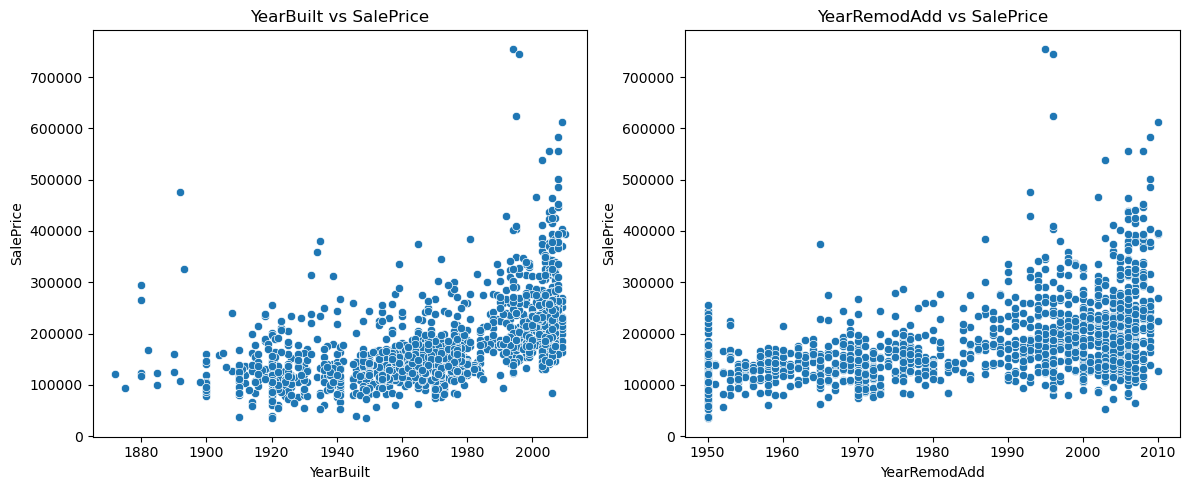

In [652]:
# Crear subplot de 1x2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot de YearBuilt vs SalePrice
sns.scatterplot(data=df_train, x='YearBuilt', y='SalePrice', ax=axs[0])
axs[0].set_title('YearBuilt vs SalePrice')
axs[0].set_xlabel('YearBuilt')
axs[0].set_ylabel('SalePrice')

# Scatter plot de YearRemodAdd vs SalePrice
sns.scatterplot(data=df_train, x='YearRemodAdd', y='SalePrice', ax=axs[1])
axs[1].set_title('YearRemodAdd vs SalePrice')
axs[1].set_xlabel('YearRemodAdd')
axs[1].set_ylabel('SalePrice')

# Ajustar espaciado
plt.tight_layout()
plt.show()



### Conclusion 

Las variables de tiempo y se dividen en 2 las que hablan de la "edad" de la casa hablando de año de construcción o remodelación y las que tiene que ver con el momento de venta. Las que tiene que ver con el momento de la venta no las gráfico por no dan información interesante ya que no podemos estudiar el contexto económico para esas fechas por oto lado si las voy usar mas adelante para la creación de nuevas variable, también destacar que se muestra en los gráficos lo que uno podría intuir que las casa menos viejas y las remodeladas tienen mejor precio promedio. 

# 7. Techo

contiene: **RoofMtrl**,**RoofStyle** 

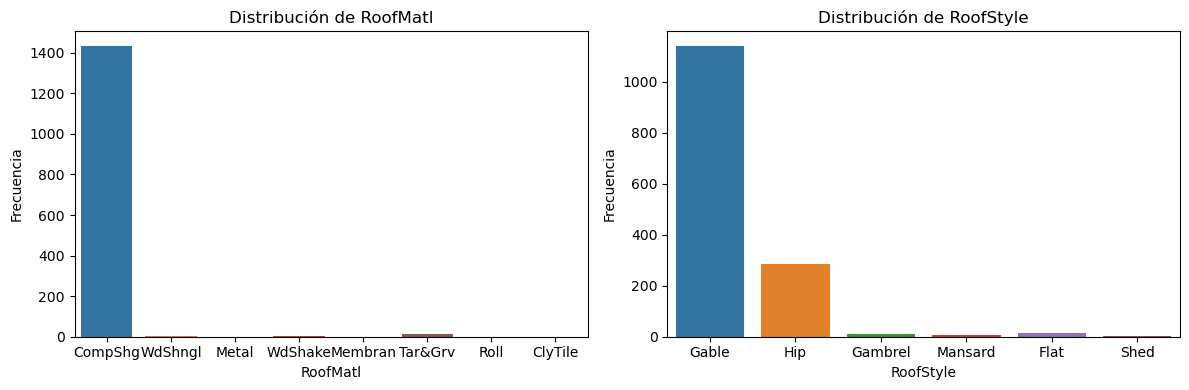

In [653]:
# Crear subplot de 1x2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Gráfico de barras para RoofMatl
sns.countplot(data=df_train, x='RoofMatl', ax=axs[0])
axs[0].set_title('Distribución de RoofMatl')
axs[0].set_xlabel('RoofMatl')
axs[0].set_ylabel('Frecuencia')

# Gráfico de barras para RoofStyle
sns.countplot(data=df_train, x='RoofStyle', ax=axs[1])
axs[1].set_title('Distribución de RoofStyle')
axs[1].set_xlabel('RoofStyle')
axs[1].set_ylabel('Frecuencia')

# Ajustar espaciado
plt.tight_layout()
plt.show()


### Conclusiones 

Las dos variables presentan gran desbalance en los datos, ademas de no mostrar gran diferencia en el precio de venta. 

# 8 Revestimiento 

Contiene: **Exterior1st**, **Exterior2nd**, **MasVnrType**, **MasVnrArea**, **ExterQual** ,  **ExterCond**

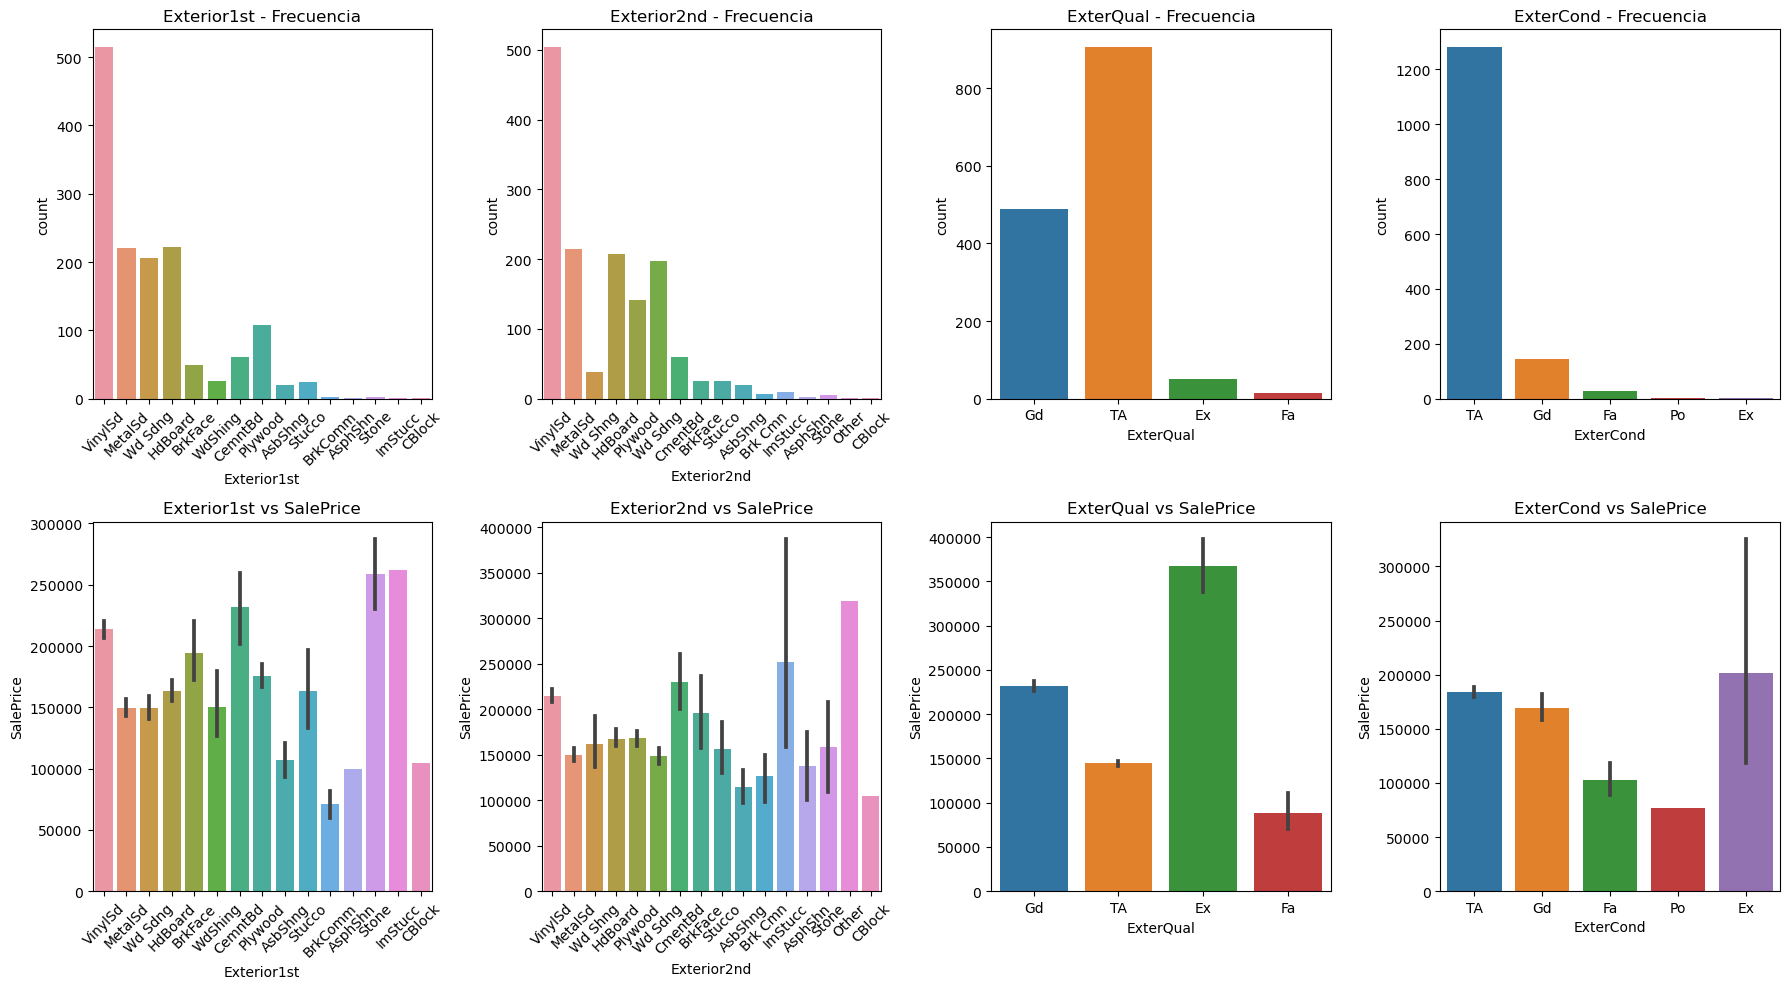

In [654]:
# Crear subplot de 2x4
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Gráficos de barras para la frecuencia
sns.countplot(data=df_train, x='Exterior1st', ax=axs[0, 0])
axs[0, 0].set_title('Exterior1st - Frecuencia')
if 'Exterior1st' in ['Exterior1st', 'Exterior2nd']:
    axs[0, 0].tick_params(axis='x', rotation=45)
sns.countplot(data=df_train, x='Exterior2nd', ax=axs[0, 1])
axs[0, 1].set_title('Exterior2nd - Frecuencia')
if 'Exterior2nd' in ['Exterior1st', 'Exterior2nd']:
    axs[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(data=df_train, x='ExterQual', ax=axs[0, 2])
axs[0, 2].set_title('ExterQual - Frecuencia')
sns.countplot(data=df_train, x='ExterCond', ax=axs[0, 3])
axs[0, 3].set_title('ExterCond - Frecuencia')

# Gráficos de barras para la relación con SalePrice
sns.barplot(data=df_train, x='Exterior1st', y='SalePrice', ax=axs[1, 0])
axs[1, 0].set_title('Exterior1st vs SalePrice')
if 'Exterior1st' in ['Exterior1st', 'Exterior2nd']:
    axs[1, 0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_train, x='Exterior2nd', y='SalePrice', ax=axs[1, 1])
axs[1, 1].set_title('Exterior2nd vs SalePrice')
if 'Exterior2nd' in ['Exterior1st', 'Exterior2nd']:
    axs[1, 1].tick_params(axis='x', rotation=45)
sns.barplot(data=df_train, x='ExterQual', y='SalePrice', ax=axs[1, 2])
axs[1, 2].set_title('ExterQual vs SalePrice')
sns.barplot(data=df_train, x='ExterCond', y='SalePrice', ax=axs[1, 3])
axs[1, 3].set_title('ExterCond vs SalePrice')

# Ajustar espaciado
plt.tight_layout()
plt.show()


In [655]:
# Mapeo para ExterQual y ExterCond
mapeo = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None':0}

# Aplicar mapeo a ExterQual y ExterCond
df_train['ExterQual'] = df_train['ExterQual'].map(mapeo)
df_train['ExterCond'] = df_train['ExterCond'].map(mapeo)


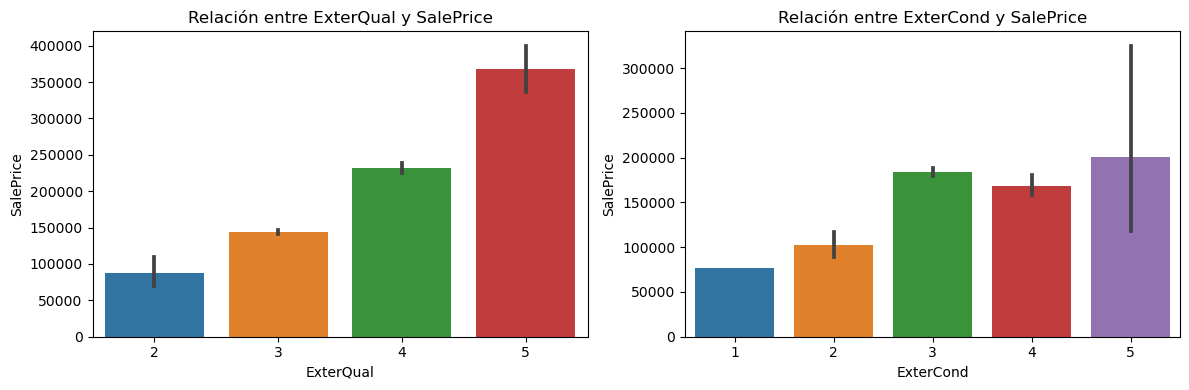

In [656]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Gráfico de barras para ExterQual
sns.barplot(x='ExterQual', y='SalePrice', data=df_train, ax=axs[0])
axs[0].set_xlabel('ExterQual')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Relación entre ExterQual y SalePrice')

# Gráfico de barras para ExterCond
sns.barplot(x='ExterCond', y='SalePrice', data=df_train,  ax=axs[1])
axs[1].set_xlabel('ExterCond')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Relación entre ExterCond y SalePrice')

plt.tight_layout()
plt.show()


In [657]:
# Crear una tabla de correlaciones
correlation_table = df_train[['SalePrice', 'ExterQual', 'ExterCond']].corr()

# Imprimir la tabla de correlaciones
print(correlation_table)

           SalePrice  ExterQual  ExterCond
SalePrice   1.000000   0.682639   0.018899
ExterQual   0.682639   1.000000   0.009184
ExterCond   0.018899   0.009184   1.000000


### Conclusion 1  

Dentro de esta primera parte los materiales  **Exterior1st** y **Exterior2st** no presentan una buena correlación con respecto al precio en los gráficos se puede apreciar que los principales 5 materiales recogen el 90% de los registros y que entre estos no hay diferencia apreciable en el valor, solo uno destaca del resto pero este mismo tiene 2.5 veces mas registros que sus compañeros con lo cual puede estar moviendo el gráfico a su favor. 

**ExterCond** tiene un problema parecido esta muy desbalanceados y el 95% de los datos se encuentran entre 3 posibilidades las cuales no presentan gran diferencia cuando se habla del valor de la vivienda. 

**ExterQual** el cual recoge la data sobre la cualidad de los materiales si esta mejor balanceado y muestra una clara diferenciación entre los valores llegando a una correlación del 68% con respecto del valor. 

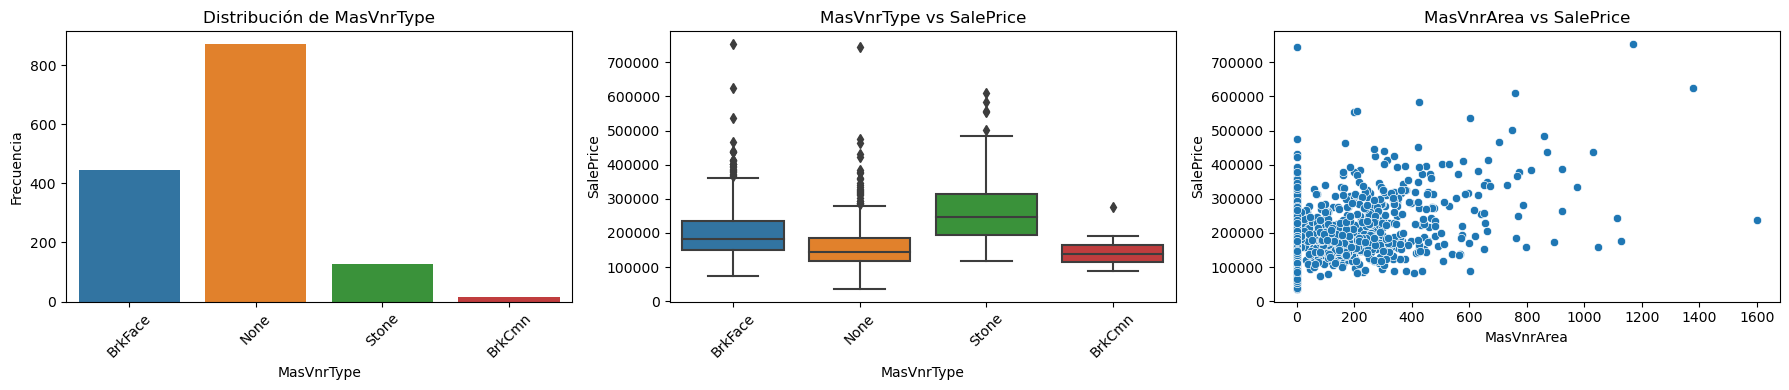

In [658]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Gráfico de barras para MasVnrType
sns.countplot(x='MasVnrType', data=df_train, ax=axs[0])
axs[0].set_xlabel('MasVnrType')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de MasVnrType')
axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

# Boxplot para MasVnrType vs SalePrice
sns.boxplot(x='MasVnrType', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('MasVnrType')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('MasVnrType vs SalePrice')
axs[1].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

# Scatter plot para MasVnrArea vs SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df_train, ax=axs[2])
axs[2].set_xlabel('MasVnrArea')
axs[2].set_ylabel('SalePrice')
axs[2].set_title('MasVnrArea vs SalePrice')

plt.tight_layout()
plt.show()


In [659]:
# Calcular la correlación entre MasVnrArea y SalePrice
correlation_mas_vnr_area = df_train['MasVnrArea'].corr(df_train['SalePrice'])
print("Correlación entre MasVnrArea y SalePrice:", correlation_mas_vnr_area)


Correlación entre MasVnrArea y SalePrice: 0.4762737610192454


In [660]:
# Crear el mapeo para MasVnrType
mapeo_MasVnrType = {
    'None': 0,
    'BrkCmn': 1,
    'BrkFace': 1,
    'Stone': 2
}

# Aplicar el mapeo a la columna MasVnrType
df_train['MasVnrType'] = df_train['MasVnrType'].map(mapeo_MasVnrType)

# Calcular la correlación entre MasVnrType_Mapped y SalePrice
correlation_masvnrtype = df_train['MasVnrType'].corr(df_train['SalePrice'])

print(f"Correlación entre MasVnrType y SalePrice: {correlation_masvnrtype}")


Correlación entre MasVnrType y SalePrice: 0.4199309430886725


### Conclusion 2 

**MasVrnArea** habla sobre el area en pies cuadrados de mampostería 

Esta presenta una cierta correlación, aunque no es ta buena como me gustaría mas adelante la voy a combinar con su compañera para vi las puedo mejorar. 

**MasVrnType** Tipo de mampostería

Esta tiene una correlación un tanto mas devil aunque intente reagruparla debido a su desbalance, otra vez la poca cantidad de registros interviniendo en el estudio. 

# 9. Porch 

Contiene:  **OpenPorchSF**, **EnclosedPorch**, **3SsnPorch**, **ScreenPorch**

Debido a la naturaleza de esta variable voy a unirlas en una sola para ver la relación entre el area de una casa con porch y el precio de venta 

In [661]:
# Crear la variable 'PorchArea' en df_train que contenga la suma de las áreas de las cuatro opciones
df_train['PorchArea'] = df_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)
df_train['PorchArea'].head()

0     61
1      0
2     42
3    307
4     84
Name: PorchArea, dtype: int64

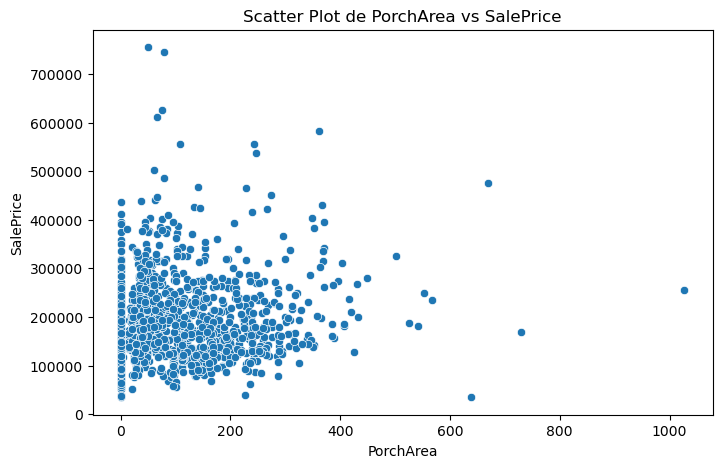

In [662]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PorchArea', y='SalePrice', data=df_train)
plt.title('Scatter Plot de PorchArea vs SalePrice')
plt.xlabel('PorchArea')
plt.ylabel('SalePrice')
plt.show()


### Conclusion 

La variable no parece mostrar una correlación con el precio  es más como una nube de puntos mas adelante voy a usar las 4 variables para crea un categórica nueva para ver si puedo rescatar algo del tener o no porch. 

# 10. Venta

Contiene :  **SaleType**, **SaleCond**

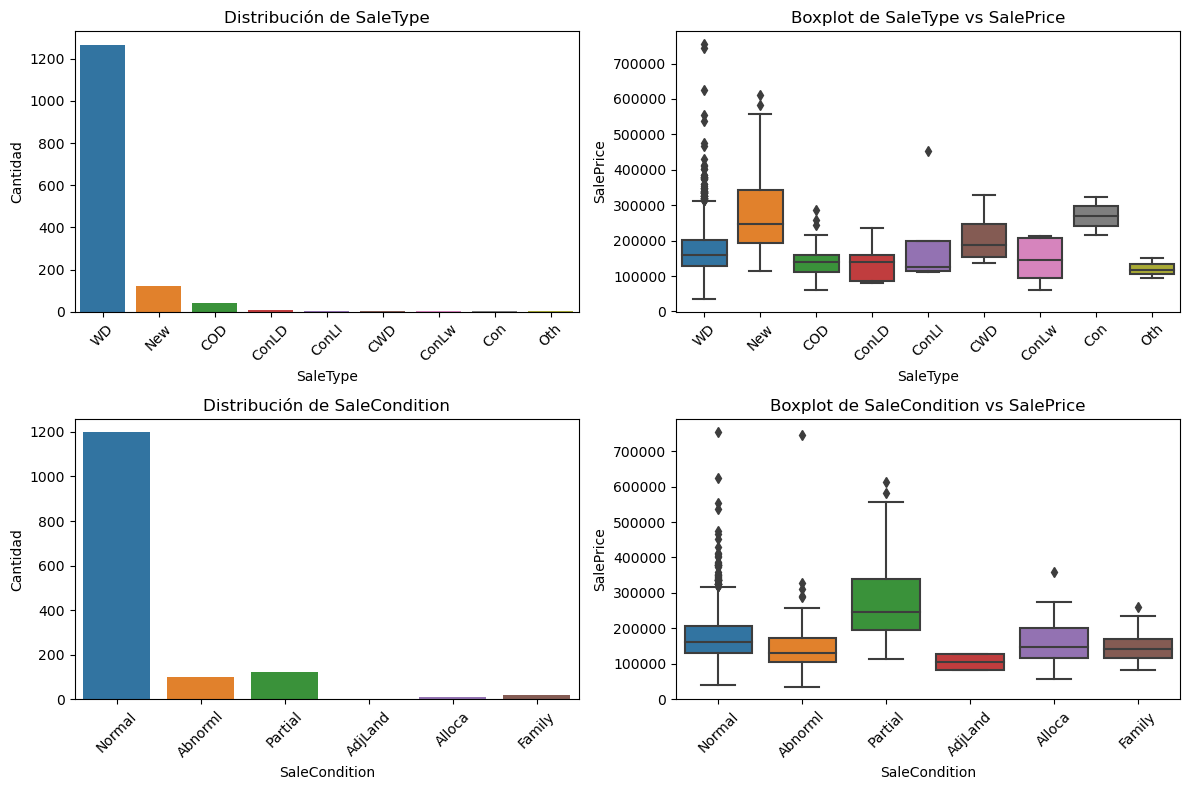

In [663]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Variables a considerar
variables = ['SaleType', 'SaleCondition']

# Iterar sobre las variables y crear los gráficos
for i, var in enumerate(variables):
    # Gráfico de barras para la cantidad
    sns.countplot(x=var, data=df_train, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribución de {var}')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Cantidad')
    axs[i, 0].tick_params(axis='x', rotation=45)

    # Boxplot contra SalePrice
    sns.boxplot(x=var, y='SalePrice', data=df_train, ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot de {var} vs SalePrice')
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('SalePrice')
    axs[i, 1].tick_params(axis='x', rotation=45)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


### Conclusion 

Los datos no arrojan valor ya que están muy desbalanceados la gran mayoría de los casos caen en tipos de venta normales aparte e que no muestran gran distinción en cuando al precio con los demás, también los 2 grupos que si llama la atención su discriminación en el precio mostrado en el boxplot  hacen referencias a casa nuevas o que estaban siendo terminadas al momento de su venta, esta característica aunque llamativa se vera reflejada en otra variable que creare mas adelante y que tiene mas sentido por lo cual las dejare de lado. 

# 11. Cimientos

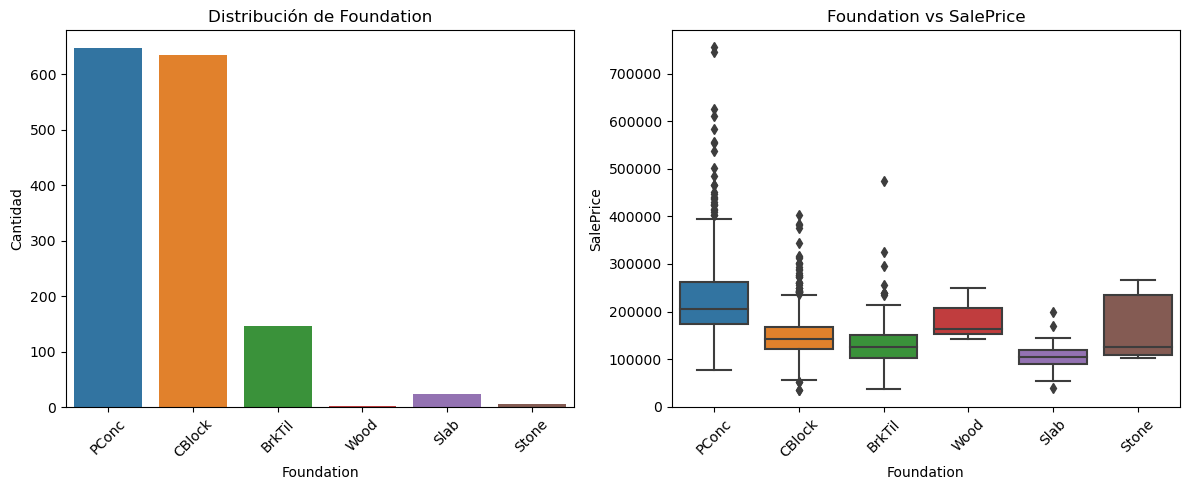

In [664]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico de barras para la distribución de Foundation
sns.countplot(x='Foundation', data=df_train, ax=axs[0])
axs[0].set_xlabel('Foundation')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Distribución de Foundation')
axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

# Boxplot para Foundation vs SalePrice
sns.boxplot(x='Foundation', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('Foundation')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Foundation vs SalePrice')
axs[1].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

plt.tight_layout()
plt.show()


In [665]:
# Crear el mapeo
mapeo_Foundation = {
    'BrkTil': 1,
    'CBlock': 2,
    'PConc': 3,
    'Slab': 0,
    'Stone': 0,
    'Wood': 0
}

# Aplicar el mapeo a la variable 'Foundation'
df_train['Foundation'] = df_train['Foundation'].map(mapeo_Foundation)


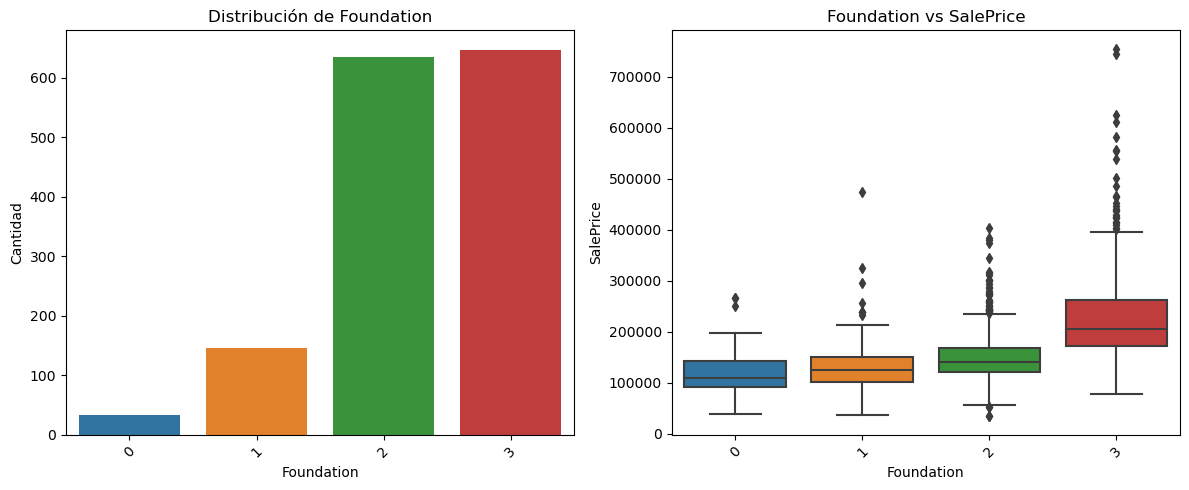

In [666]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico de barras para la distribución de Foundation
sns.countplot(x='Foundation', data=df_train, ax=axs[0])
axs[0].set_xlabel('Foundation')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Distribución de Foundation')
axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

# Boxplot para Foundation vs SalePrice
sns.boxplot(x='Foundation', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('Foundation')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Foundation vs SalePrice')
axs[1].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

plt.tight_layout()
plt.show()

In [667]:
# Calcular la correlación entre 'Foundation' y 'SalePrice'
correlation = df_train['Foundation'].corr(df_train['SalePrice'])

print("Correlación entre Foundation y SalePrice:", correlation)


Correlación entre Foundation y SalePrice: 0.46097071698645514


### Conclusion 

Los simientos **Foundation** muestran una leve correlación con el precio, aunque trate de reagruparlos según algunas características la correlación no mejor demasiado, después veré si suma o no al modelo. 

# 12. Sótano 
 
 Contiene: **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinSF1**, **BsmtFinType2**, **BsmtUnfSF**, **BsmtFinSF2**, **BsmtFinSF1**.

Las variables del sótano se dividen entre calidad, exposición y tamaño 

**BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **BsmtQual**:  estas hablan sobre los tamaños, voy a dar solo un pequeño vistazo puesto que estas ya están expresadas en **TotalBsmtSF**  que ya fue estudiada, a excepción de BsmtQual que aunque captura una medida se toma como categoría. 

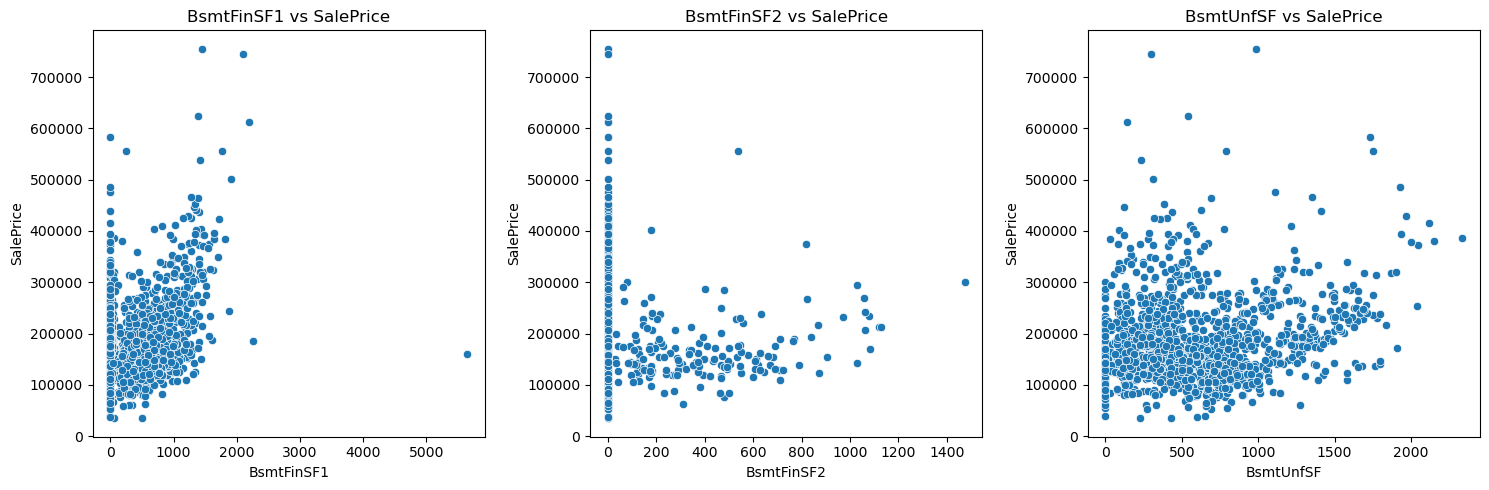

In [668]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot para BsmtFinSF1
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df_train, ax=axs[0])
axs[0].set_xlabel('BsmtFinSF1')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('BsmtFinSF1 vs SalePrice')

# Scatter plot para BsmtFinSF2
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('BsmtFinSF2')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('BsmtFinSF2 vs SalePrice')

# Scatter plot para BsmtUnfSF
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=df_train, ax=axs[2])
axs[2].set_xlabel('BsmtUnfSF')
axs[2].set_ylabel('SalePrice')
axs[2].set_title('BsmtUnfSF vs SalePrice')

plt.tight_layout()
plt.show()


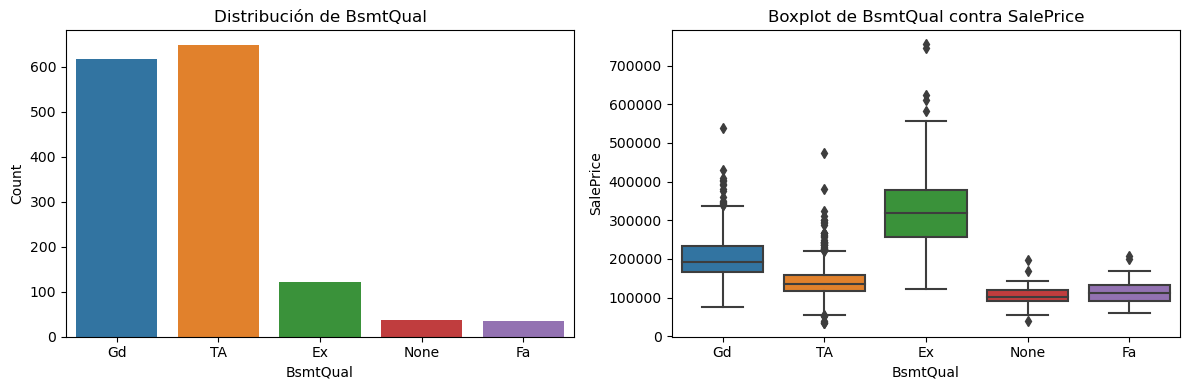

In [669]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Gráfico de barras para la distribución de BsmtQual
sns.countplot(x='BsmtQual', data=df_train, ax=axs[0])
axs[0].set_xlabel('BsmtQual')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribución de BsmtQual')

# Boxplot de BsmtQual contra SalePrice
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('BsmtQual')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Boxplot de BsmtQual contra SalePrice')

plt.tight_layout()
plt.show()


In [670]:
# Aplicar el mapeo a la variable BsmtQual
mapeo = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
df_train['BsmtQual'] = df_train['BsmtQual'].map(mapeo)

# Calcular la correlación entre BsmtQual y SalePrice
correlation = df_train['BsmtQual'].corr(df_train['SalePrice'])
print("Correlación entre BsmtQual y SalePrice:", correlation)


Correlación entre BsmtQual y SalePrice: 0.5852071991725198


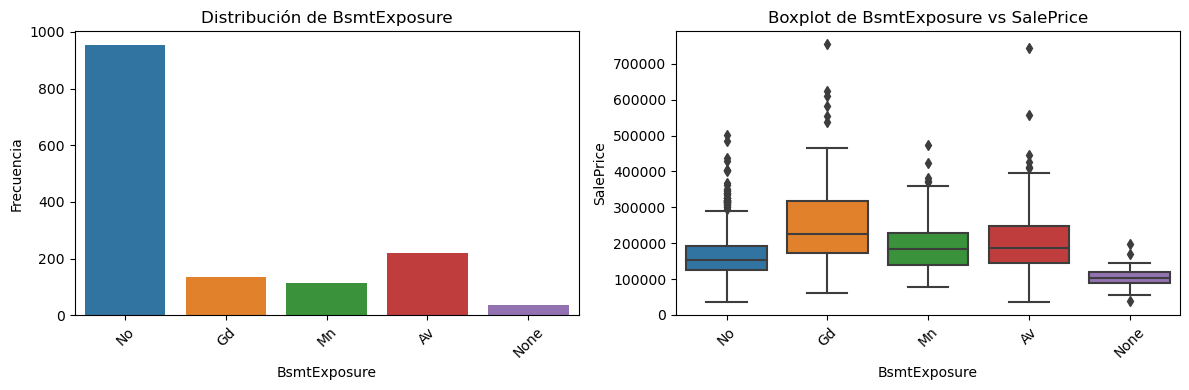

In [671]:

# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Gráfico de barras para la distribución de BsmtExposure
sns.countplot(x='BsmtExposure', data=df_train, ax=axs[0])
axs[0].set_xlabel('BsmtExposure')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de BsmtExposure')
axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

# Boxplot para la relación entre BsmtExposure y SalePrice
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('BsmtExposure')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Boxplot de BsmtExposure vs SalePrice')
axs[1].tick_params(axis='x', rotation=45)  # Rotar etiquetas en el eje x

plt.tight_layout()
plt.show()


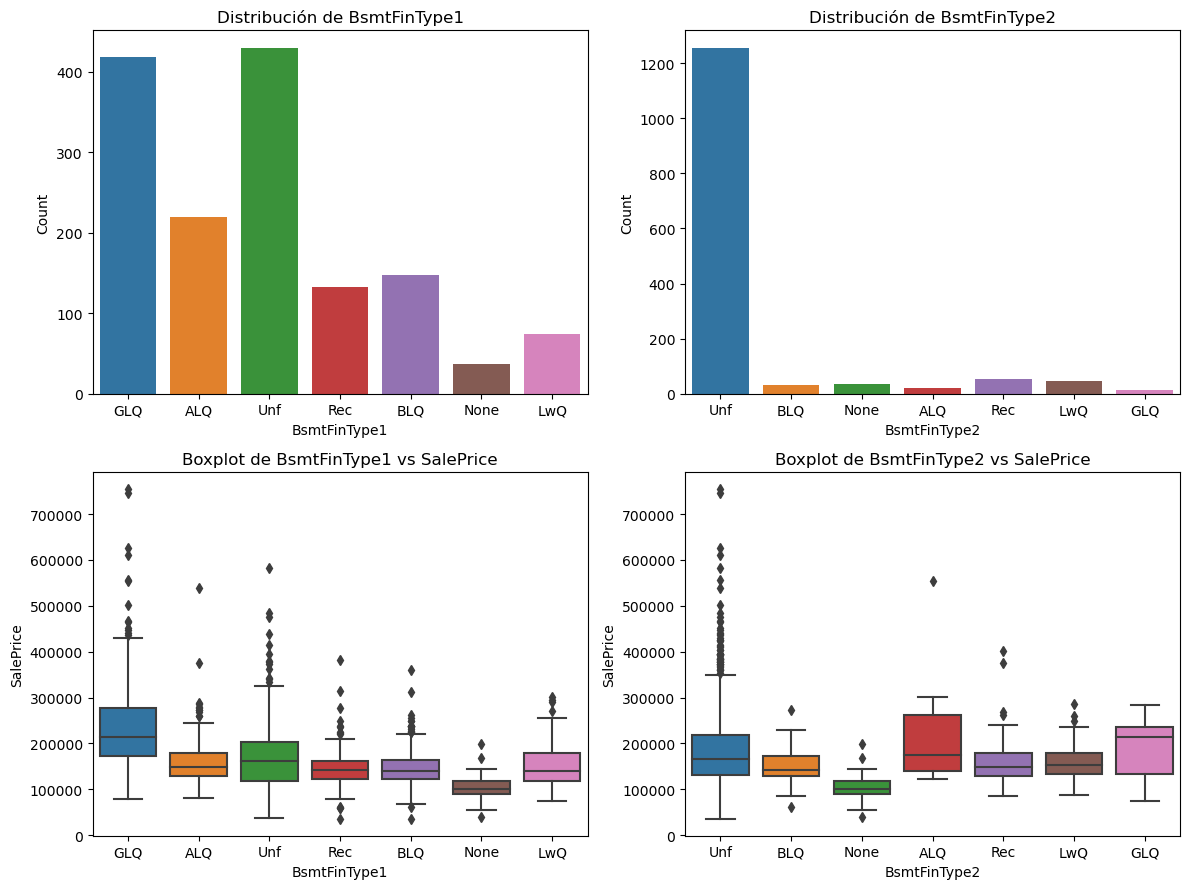

In [672]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

# Gráfico de barras para BsmtFinType1
sns.countplot(x='BsmtFinType1', data=df_train, ax=axs[0, 0])
axs[0, 0].set_xlabel('BsmtFinType1')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Distribución de BsmtFinType1')

# Boxplot para BsmtFinType1 contra SalePrice
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=df_train, ax=axs[1, 0])
axs[1, 0].set_xlabel('BsmtFinType1')
axs[1, 0].set_ylabel('SalePrice')
axs[1, 0].set_title('Boxplot de BsmtFinType1 vs SalePrice')

# Gráfico de barras para BsmtFinType2
sns.countplot(x='BsmtFinType2', data=df_train, ax=axs[0, 1])
axs[0, 1].set_xlabel('BsmtFinType2')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Distribución de BsmtFinType2')

# Boxplot para BsmtFinType2 contra SalePrice
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=df_train, ax=axs[1, 1])
axs[1, 1].set_xlabel('BsmtFinType2')
axs[1, 1].set_ylabel('SalePrice')
axs[1, 1].set_title('Boxplot de BsmtFinType2 vs SalePrice')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()



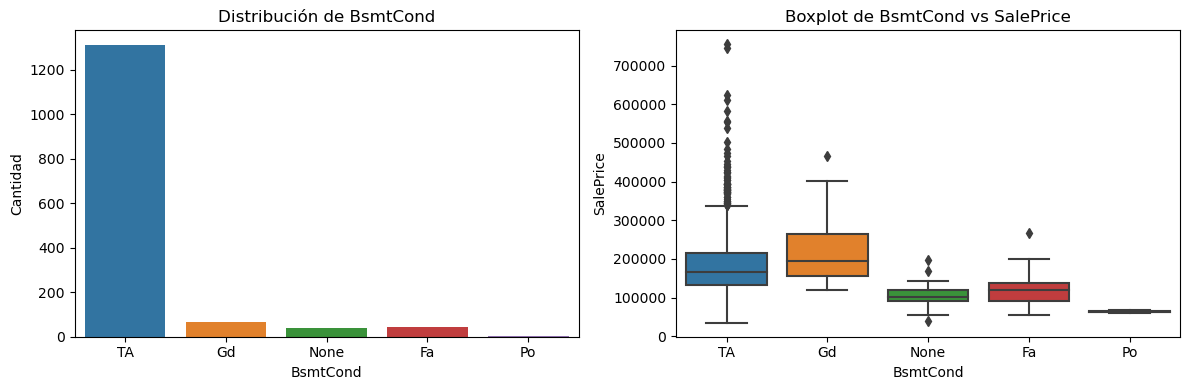

In [673]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Gráfico de barras para la distribución de BsmtCond
sns.countplot(x='BsmtCond', data=df_train, ax=axs[0])
axs[0].set_xlabel('BsmtCond')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Distribución de BsmtCond')

# Boxplot para BsmtCond contra SalePrice
sns.boxplot(x='BsmtCond', y='SalePrice', data=df_train, ax=axs[1])
axs[1].set_xlabel('BsmtCond')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Boxplot de BsmtCond vs SalePrice')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()



In [674]:
# Mapeo para BsmtCond
mapeo_bsmtcond = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

# Aplicar mapeo a la columna bsmtcond
df_train['BsmtCond'] = df_train['BsmtCond'].map(mapeo_bsmtcond)

### Conclusiones 

**BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF** -  hablan sobre los tamaños de las zonas terminadas y no terminadas del sótano 

Por separado no son de gran ayuda pero junta son una buena predictiva como vimos con anterioridad. 

**BsmtQual** Habla de la altura del sótano en pulgas. 

Aquí hubo más suerte puesto que esta si nos brinda buena información dando casi un 0.6 de correlación con el precio 

**BsmtExposure** habla de la exposición al exterior (ventanas y puertas)

Aquí los datos aunque muestran alguna tendencia como nos dice la lógica están desbalanceados como en los siguientes casos

**BstmFinType1** y **BsmtFinType2** hablan sobre la utilidad del area señalada y de la segunda de haber 

Aquí no parece variar demasiado los precios según la segmentación sobre todo no en los 3 que capturan el 90% de los datos

Mas adelante intentare Componente principales para ver si puedo capturar algo mas de información. 

# 13 Calefacción / Aire  

Contiene: **Heating**, **HeatingQC**, **CentralAir**, **FirePlaces**, **FirePlaceQu** 

In [675]:
# Mapeo para FireplaceQu y HeatingQC
mapeo = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

# Aplicar mapeo a FireplaceQu y HeatingQC
df_train['FireplaceQu'] = df_train['FireplaceQu'].map(mapeo)
df_train['HeatingQC'] = df_train['HeatingQC'].map(mapeo)


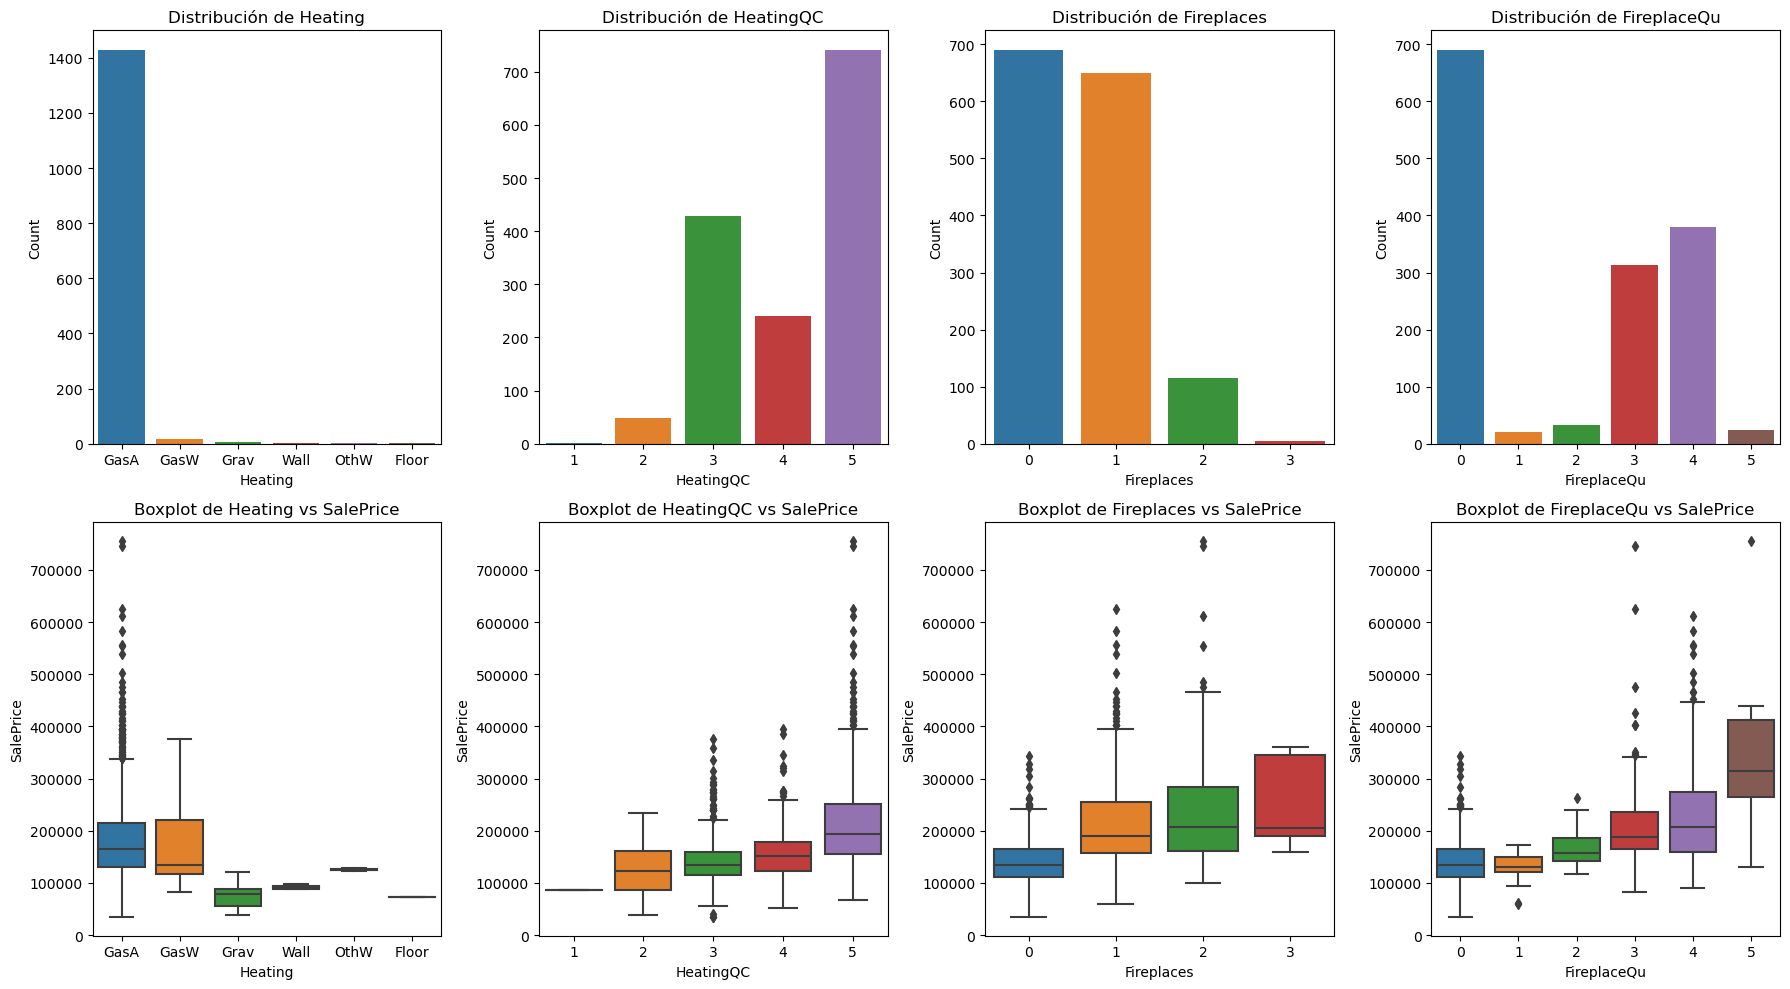

In [677]:

# Crear subplot de 2x4
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Gráfico de barras para Heating
sns.countplot(x='Heating', data=df_train, ax=axs[0, 0])
axs[0, 0].set_xlabel('Heating')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Distribución de Heating')

# Boxplot para Heating vs SalePrice
sns.boxplot(x='Heating', y='SalePrice', data=df_train, ax=axs[1, 0])
axs[1, 0].set_xlabel('Heating')
axs[1, 0].set_ylabel('SalePrice')
axs[1, 0].set_title('Boxplot de Heating vs SalePrice') 

# Gráfico de barras para HeatingQC
sns.countplot(x='HeatingQC', data=df_train, ax=axs[0, 1])
axs[0, 1].set_xlabel('HeatingQC')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Distribución de HeatingQC') 

# Boxplot para HeatingQC vs SalePrice
sns.boxplot(x='HeatingQC', y='SalePrice', data=df_train, ax=axs[1, 1])
axs[1, 1].set_xlabel('HeatingQC')
axs[1, 1].set_ylabel('SalePrice')
axs[1, 1].set_title('Boxplot de HeatingQC vs SalePrice') 

# Gráfico de barras para Fireplaces
sns.countplot(x='Fireplaces', data=df_train, ax=axs[0, 2])
axs[0, 2].set_xlabel('Fireplaces')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Distribución de Fireplaces') 

# Boxplot para Fireplaces vs SalePrice
sns.boxplot(x='Fireplaces', y='SalePrice', data=df_train, ax=axs[1, 2])
axs[1, 2].set_xlabel('Fireplaces')
axs[1, 2].set_ylabel('SalePrice')
axs[1, 2].set_title('Boxplot de Fireplaces vs SalePrice')

# Gráfico de barras para FireplaceQu
sns.countplot(x='FireplaceQu', data=df_train, ax=axs[0, 3])
axs[0, 3].set_xlabel('FireplaceQu')
axs[0, 3].set_ylabel('Count')
axs[0, 3].set_title('Distribución de FireplaceQu') 

# Boxplot para FireplaceQu vs SalePrice
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df_train, ax=axs[1, 3])
axs[1, 3].set_xlabel('FireplaceQu')
axs[1, 3].set_ylabel('SalePrice')
axs[1, 3].set_title('Boxplot de FireplaceQu vs SalePrice') 

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


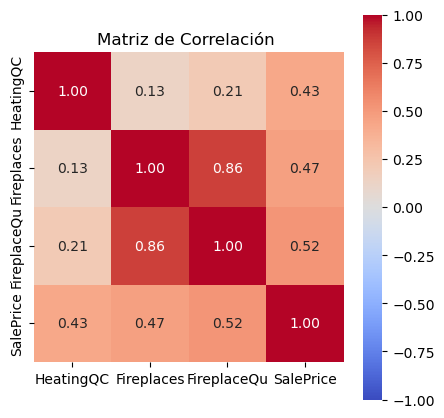

In [681]:
# Seleccionar las variables relevantes
relevant_columns = ['HeatingQC', 'Fireplaces', 'FireplaceQu', 'SalePrice']
df_relevant = df_train[relevant_columns]

# Calcular la matriz de correlación
correlation_matrix = df_relevant.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, square=True)
plt.title('Matriz de Correlación ')
plt.show()

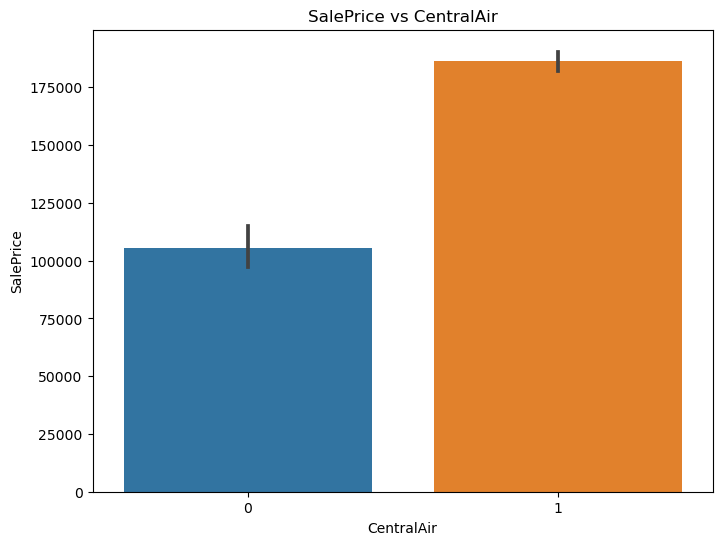

In [682]:
df_train['CentralAir'] = df_train['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

plt.figure(figsize=(8, 6))
sns.barplot(x='CentralAir', y='SalePrice', data=df_train)
plt.xlabel('CentralAir')
plt.ylabel('SalePrice')
plt.title('SalePrice vs CentralAir')
plt.show()



In [685]:
df_train['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [683]:
# Calcular la correlación entre CentralAir y SalePrice
correlation = df_train['CentralAir'].corr(df_train['SalePrice'])

# Imprimir la correlación
print(f"Correlación entre CentralAir y SalePrice: {correlation}")


Correlación entre CentralAir y SalePrice: 0.2513281638401553


### Conclusion 

**Heating** - Habla sobre el tipo de calefacción 

Es una variable totalmente desbalanceada para tenerla en cuenta.

**HeatingQC** - Estado de la calefacción 

En este caso tenemos una mejor correlación ya que hay una mejor distribución en la categoría pero no lo suficiente por la pequeña cantidad de datos. 

**FirePlaces** cantidad de chimeneas 

Pobre distribución en los datos de otra forma seria de gran ayuda. 

**FirePlaceQu** Calidad de la chimenea

Esta si presenta un distribución un poco mejor con respecto a su vecina en consecuencia un aumento en la correlación superando el 0.5. 

**CentralAir**  Aire acondicionado 

Otra muestra de como el desbalance en los datos puede arruinar una variable aquí el gráfico nos muestra una claricima diferencia entre tener y no tener pero cuando se calcula la correlación con el precio de venta no arroja un valor demasiado pequeño. 

# 14. Servicios

contiene:  **Electrical**, **Utilities**  

In [686]:
df_train['Electrical'].value_counts()


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [687]:
df_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Conclusiones

Ambos totalmente desbalanceados mas resultados como los que venimos viendo. 

# 15. Baños 

Contiene: **BsmtFullBath**, **BmstHalfBath**, **FullBath**, **HalfBath**.

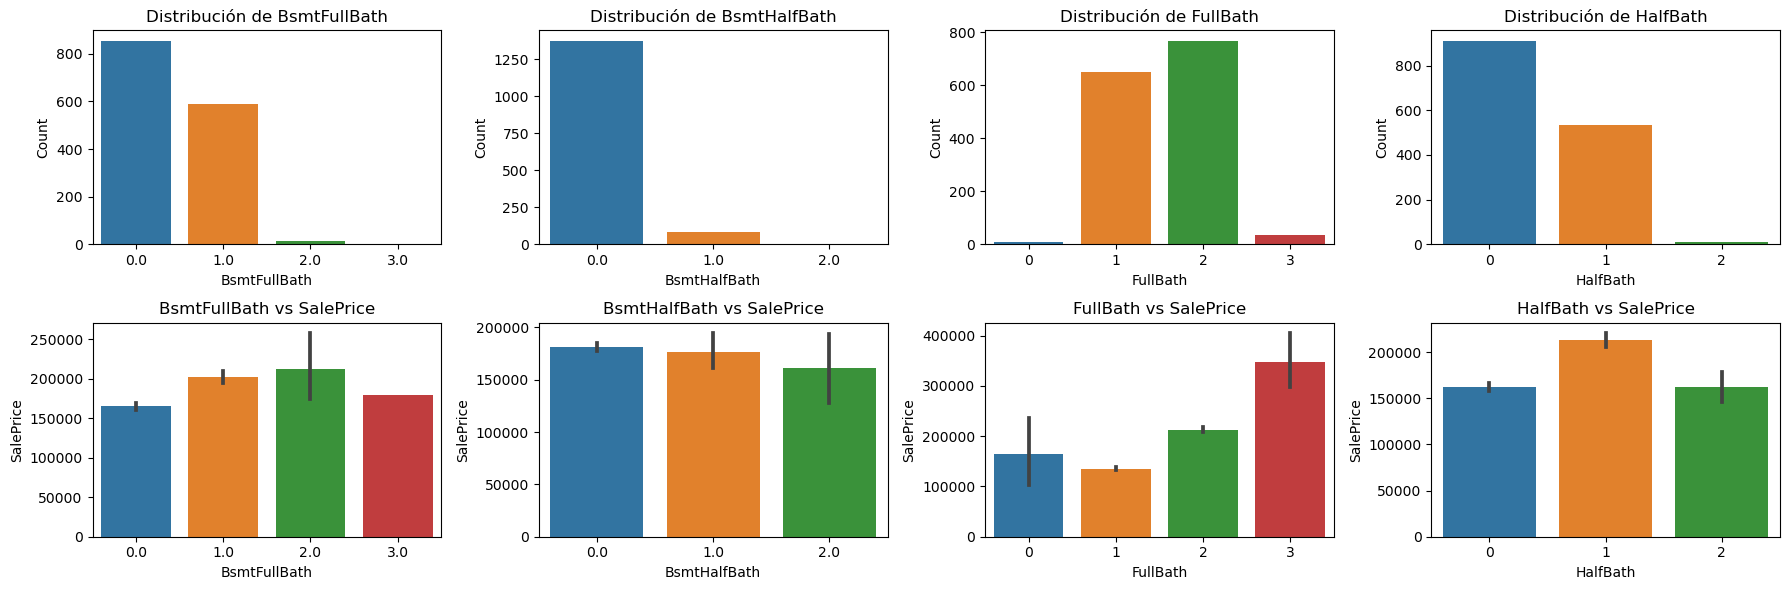

In [689]:
# Crear subplots 2x4
fig, axs = plt.subplots(2, 4, figsize=(18, 6))

# Variables a considerar
variables = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

# Gráficos de barras para distribución
for i, variable in enumerate(variables):
    # Barras de distribución
    sns.countplot(x=variable, data=df_train, ax=axs[0, i])
    axs[0, i].set_title(f'Distribución de {variable}')
    axs[0, i].set_xlabel(variable)
    axs[0, i].set_ylabel('Count')

    # Barras contra SalePrice
    sns.barplot(x=variable, y='SalePrice', data=df_train, ax=axs[1, i])
    axs[1, i].set_title(f'{variable} vs SalePrice')
    axs[1, i].set_xlabel(variable)
    axs[1, i].set_ylabel('SalePrice')

# Ajustar espaciado
plt.tight_layout()
plt.show()


In [691]:
# Crear variable FullBathTotal sumando BsmtFullBath y FullBath
df_train['FullBathTotal'] = df_train['BsmtFullBath'] + df_train['FullBath']

# Crear variable HalfBathTotal sumando BsmtHalfBath y HalfBath
df_train['HalfBathTotal'] = df_train['BsmtHalfBath'] + df_train['HalfBath']


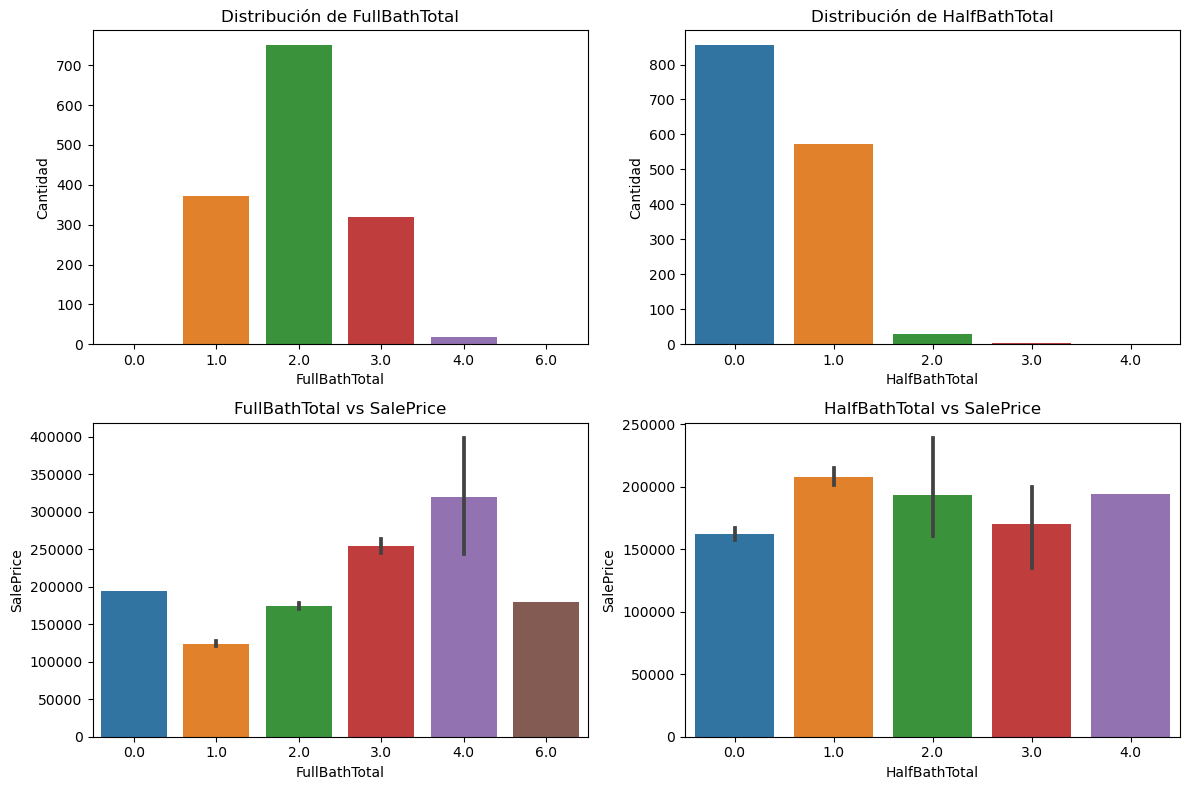

In [692]:
# Crear figura y ejes para el subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Gráfico de barras para FullBathTotal (cantidad)
sns.countplot(x='FullBathTotal', data=df_train, ax=axs[0, 0])
axs[0, 0].set_xlabel('FullBathTotal')
axs[0, 0].set_ylabel('Cantidad')
axs[0, 0].set_title('Distribución de FullBathTotal')

# Gráfico de barras para FullBathTotal contra SalePrice
sns.barplot(x='FullBathTotal', y='SalePrice', data=df_train, ax=axs[1, 0])
axs[1, 0].set_xlabel('FullBathTotal')
axs[1, 0].set_ylabel('SalePrice')
axs[1, 0].set_title('FullBathTotal vs SalePrice')

# Gráfico de barras para HalfBathTotal (cantidad)
sns.countplot(x='HalfBathTotal', data=df_train, ax=axs[0, 1])
axs[0, 1].set_xlabel('HalfBathTotal')
axs[0, 1].set_ylabel('Cantidad')
axs[0, 1].set_title('Distribución de HalfBathTotal')

# Gráfico de barras para HalfBathTotal contra SalePrice
sns.barplot(x='HalfBathTotal', y='SalePrice', data=df_train, ax=axs[1, 1])
axs[1, 1].set_xlabel('HalfBathTotal')
axs[1, 1].set_ylabel('SalePrice')
axs[1, 1].set_title('HalfBathTotal vs SalePrice')

plt.tight_layout()
plt.show()


In [693]:
correlation_full_bath = df_train['FullBathTotal'].corr(df_train['SalePrice'])
correlation_half_bath = df_train['HalfBathTotal'].corr(df_train['SalePrice'])

print("Correlación entre FullBathTotal y SalePrice:", correlation_full_bath)
print("Correlación entre HalfBathTotal y SalePrice:", correlation_half_bath)


Correlación entre FullBathTotal y SalePrice: 0.5829341127530338
Correlación entre HalfBathTotal y SalePrice: 0.25062831491104437


### Concluciones 

Estas variables hablan sobre cantidad de baños y medios baños en la casas y el sótano, por separado la importancia se difumina gracias a la distribución pero a medida que agrupamos la correlación mejor sobre todo para los baños completos, mas adelante creare una sola que capture todos los datos. 

# 16. Habitaciones 

contiene: **Bedroom**, **TotRmsAbvGrnd** 